在本章中，我们将讨论样条曲线，它是第 3 章中引入的概念的扩展，旨在增加更多灵活性。   
在第 3 章介绍的模型中，因变量和自变量之间的关系在整个域中是相同的。相比之下，样条曲线可以将问题分解为多个局部解决方案，这些解决方案可以全部组合起来产生有用的全局解决方案。

## 5.1. 多项式回归

$$\mathbb{E}[Y]= \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \beta_m X^m$$

以上所有协变量都来自 $X$，所以就我们的实际问题而言，我们仍然拟合的是单预测器。$m$ 被称为多项式的次数。    

以下是对同样的数据，分别用次数 2，10 和 15 进行多项式回归建模。随着次数提升，曲线变得更灵活。
![](polynomial_regression.png)

多项式的一个问题是它们在全局范围内起作用，当我们应用次数为 $m$ 的多项式时，我们是在说自变量和因变量之间的关系在整个数据集中都是 $m$ 阶的。当我们的数据的不同区域需要不同级别的灵活性时，这可能会成为问题。例如这可能导致曲线过于灵活。在上图的最后一个面板中（次数=15），我们可以看到拟合曲线呈现出一个深谷，然后在 $X$ 的高值处呈现出一个高峰，即使没有这么低或高值的数据点。

此外，随着次数的增加，拟合对于点的移除变得更加敏感，或者等效地说，对于未来数据的添加更加敏感。换句话说，随着次数的增加，模型更容易过拟合。

## 5.2. 扩展特征空间

在概念层面上，我们可以将多项式回归看作是创建新预测因子的一种方法，或者更正式地说，是**扩展特征空间**的方法。通过进行这种扩展，我们能够在扩展的空间中拟合一条线，这为我们在原始数据空间中提供了一条曲线，非常整洁！然而，特征扩展并不是对统计学无政府主义的邀请，我们不能仅仅对数据应用随机变换，然后期望总是得到好的结果。实际上，正如我们刚刚看到的，应用多项式并非没有问题。    
    
为了概括特征扩展的思想，除了多项式之外，我们可以将方程扩展为以下形式：

$$ \mathbb{E}[Y]= \beta_0 + \beta_1 B_{1}(X_{1}) + \beta_2 B_{2}(X_{2}) + \cdots + \beta_m B_{m}(X_{m}) $$

其中 $B_i$ 是任意函数，称为基函数。它们的线性组合让我们得到新的函数 $f$ 。
$$\mathbb{E}[Y]= \sum_i^m \beta_i B_{i}(X_{i}) = f(X)$$

关于 $B_{i}$ 函数的选择有很多种，可以用多项式、对数、开方等等。    

另一种选择是使用指示函数，如 $I(c_i \leq x_k < c_j)$，将原始的 $\boldsymbol{X}$ 预测因子分解为（非重叠的）子集。然后在这些子集内部局部拟合多项式。这个过程导致拟合**分段多项式**，如下图所示。

![](piecewise.png)

在上图的四个面板中，目标是相同的，即逼近蓝色函数。我们首先将函数分成3个子域，用灰色虚线分隔，然后为每个子域拟合一个不同的函数。    
    
在第一个子面板（分段常数）中，我们拟合一个常数函数，可以将常数函数视为零次多项式。聚合解，被称为阶跃函数。这可能看起来是一个相当粗糙的近似，但这可能就是我们所需要的。例如，如果我们试图找出不连续的结果，如早上、下午和晚上的预期平均温度，阶跃函数可能就可以。或者当我们可以接受非平滑的近似，即使我们认为结果是平滑的。    
    
在第二个面板（分段线性）中，我们做的和第一个面板一样，但是我们使用的是线性函数，而不是常数函数，这是一个一阶多项式。注意，连续的线性解在虚线处相交，这是有意为之。我们可以将这种限制理解为尽可能使解决方案平滑。    
    
在第三个面板（分段二次）和第四个面板（分段三次）中，我们使用二次和三次分段多项式。我们可以看到，通过增加分段多项式的次数，我们得到了更加灵活的解决方案，这带来了更好的拟合，但也增加了过拟合的风险。    
    
因为最终的拟合是一个由局部解（基函数 $B_i$）构造的函数 $f$，我们可以更容易地使模型的灵活性适应数据在不同区域的需求。在这个特定的情况下，我们可以使用一个更简单的函数（低阶多项式）来拟合数据在不同区域的数据，同时为整个数据域提供一个良好的整体模型拟合。    
     
到目前为止，我们假设我们只有一个预测因子 $X$，但是同样的思想可以扩展到多个预测因子 $X_0, X_1, \cdots, X_p$。我们甚至可以添加一个逆链接函数 $\phi$，这种形式的模型被称为广义加法模型（GAM）。
$$\mathbb{E}[Y]= \phi \left(\sum_i^p f(X_i)\right)$$
    

总结一下，等式中的 $B_i$ 函数是一种巧妙的统计设备，允许我们拟合更灵活的模型。原则上，我们可以自由选择任意的 $B_i$ 函数，我们可以根据我们的领域知识，作为探索性数据分析阶段的结果，甚至通过试错来做。由于并非所有的转换都具有相同的统计性质，因此能够访问一些在更广泛的数据集上具有良好通用性质的默认函数将是很好的。从下一节开始，直到本章的剩余部分，我们将讨论的基函数限制在一种称为 B-splines 的基函数家族。

## 5.3. 样条线简介

样条线可以被看作是试图利用多项式的灵活性，但是要对它们进行控制，从而得到一个具有整体良好统计性质的模型。要定义一个样条线，我们需要定义节点。节点的目的是将变量 $\boldsymbol{X}$ 的域分割成连续的区间。例如，上图中的灰色虚线代表节点。对于我们的目的，样条线是一个被约束为连续的分段多项式，也就是说，我们强制两个连续的子多项式在节点处相交。如果子多项式的次数为 $n$，我们就说样条线的次数为 $n$。有时，样条线也被称为它们的阶数，即 $n+1$。    
    
我们可以看到，随着我们增加分段多项式的阶数，结果函数的平滑度也在增加。如我们已经提到的，子多项式应该在节点处相交。在第一个面板中，我们可能看起来在不符合，因为每条线之间有一个阶梯，也被称为不连续性，但如果我们在每个区间使用常数值，这是我们能做的最好的。    
    
在谈论样条线时，子多项式被称为基样条线或简称为B样条线。给定度数的任何样条线函数都可以构造为该度数的基样条线的线性组合。B样条线完全由一组节点和一个度数定义。   
    
Cox-de Boor递归公式定义：
![](b-splines-formula.jpg)

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
import pymc as pm
from scipy import stats
from patsy import bs, dmatrix

import numpy as np
import matplotlib.pyplot as plt

In [2]:
az.style.use('arviz-grayscale')
plt.rcParams["figure.dpi"] = 300
np.random.seed(435)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.5),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.5),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.5),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.5),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.3),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.3),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.3),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.3)]

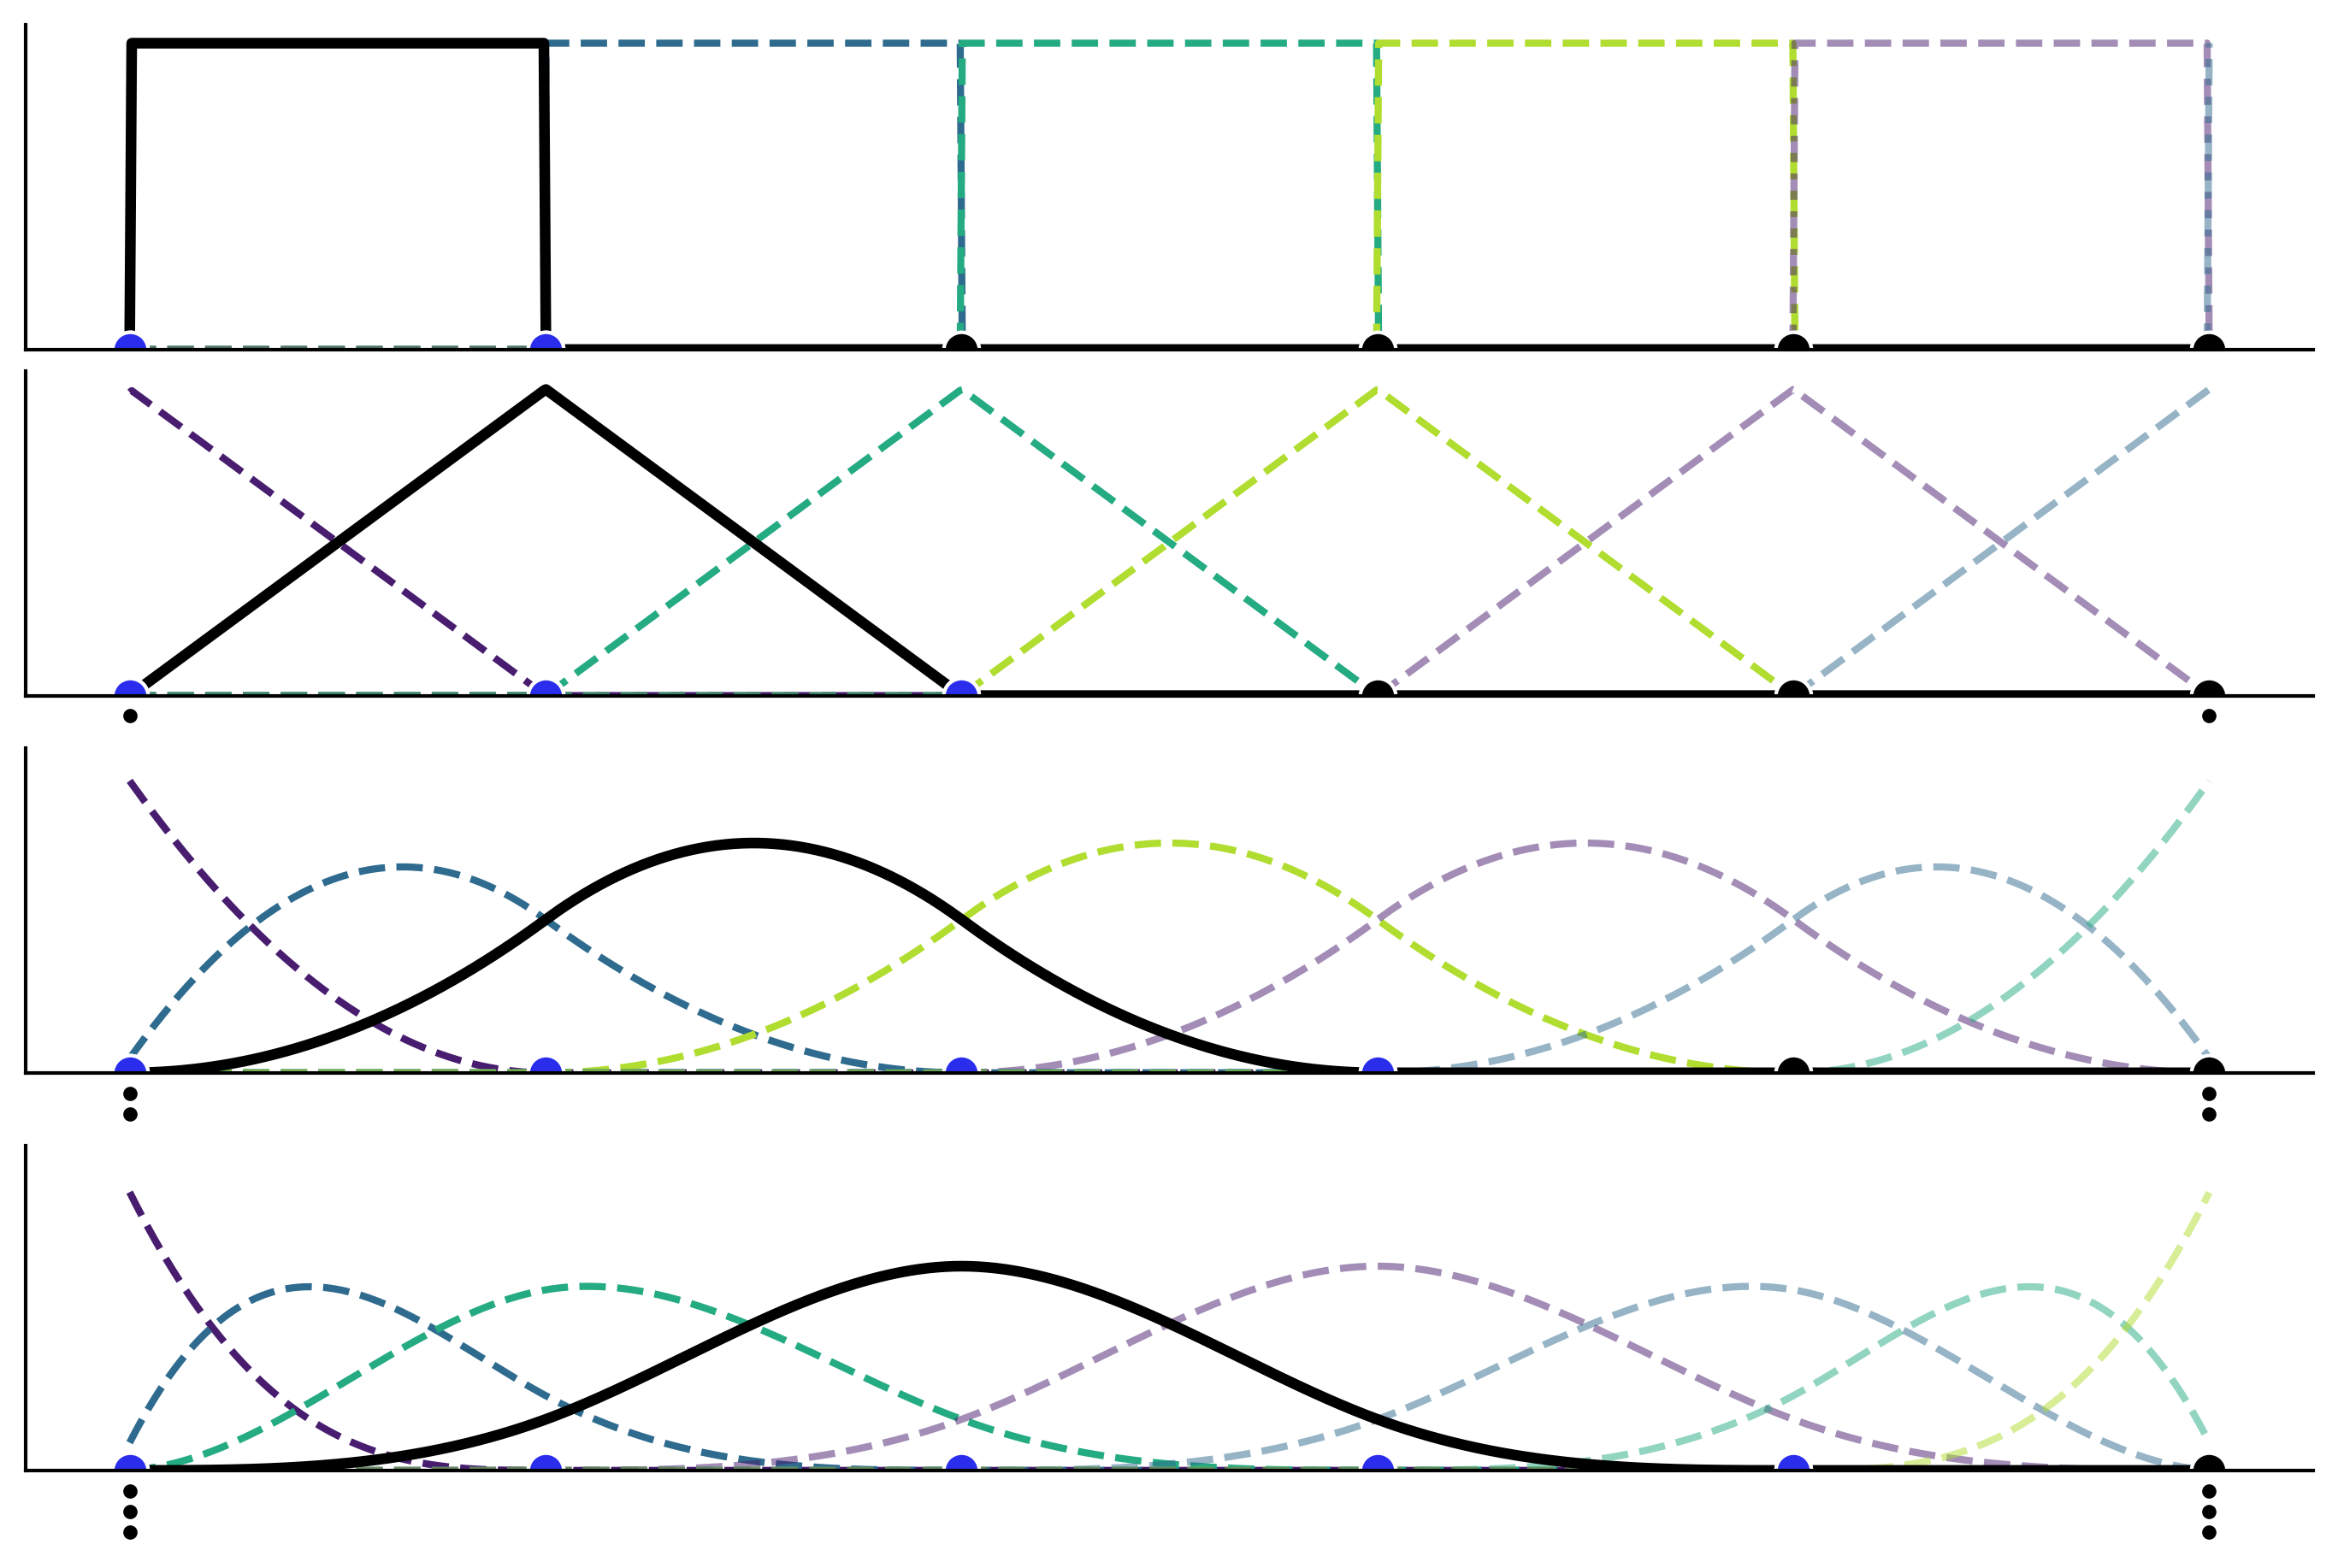

In [3]:
x = np.linspace(-0.0001, 1, 1000)
knots = [0, 0.2, 0.4, 0.6, 0.8, 1]

_, axes = plt.subplots(4, 1, figsize=(9, 6), sharex=True, sharey=True)
for deg, ax in enumerate(axes):
    b_splines = bs(x, degree=deg, knots=knots, lower_bound=-0.01, upper_bound=1.01)
    for enu, b_s in enumerate(b_splines.T):
        ax.plot(x, b_s, color=viridish[enu], lw=2, ls="--")
    ax.plot(x, b_splines[:,deg], lw=3)
    ax.plot(knots, np.zeros_like(knots), "ko", mec="w", ms=10)
    for i in range(1, deg+1):
        ax.plot([0, 1], np.array([0, 0])-(i/15), "k.", clip_on=False)
    ax.plot(knots[:deg+2], np.zeros_like(knots[:deg+2]), "C4o", mec="w", ms=10)
plt.ylim(0)
plt.xticks([])
plt.yticks([]);

随着我们增加B样条线的度数，B样条线的域越来越大。因此对于高度样条线来说，我们需要定义更多的节点。注意，在所有情况下，B样条线只在给定的区间内非零。这个属性使得样条线回归比我们从多项式回归得到的更局部。    
    
随着控制每个B样条线的节点数随度数的增长，对于所有大于0的度数，我们无法在边界附近定义B样条线。这就是为什么在图中，随着我们增加度数，B样条线在右边被突出显示为黑色的原因。这提出了一个潜在的问题，因为它使我们在边界处的B样条线少了，所以我们的近似将在那里受到影响。幸运的是，这个边界问题很容易解决，我们只需要在边界添加节点（参见图中的小点）。所以如果我们的节点是（0,1,2,3,4,5）并且我们想要拟合一个立方样条线（就像图的最后一个子图中那样），我们实际上需要使用节点集（0,0,0,0,1,2,3,4,5,5,5,5）。也就是说，我们在开始时将0填充三次，我们在结束时将5填充三次。这样做，我们现在有了五个必要的节点（0,0,0,0,1）来定义第一个B样条线（参见图最后一个子面板中看起来像指数分布的虚线）。然后我们将使用节点0,0,0,1,2来定义第二个B样条线（看起来像Beta分布的那个），等等。看看第一个完整的B样条线（黑色突出显示）是如何由节点（0,1,2,3,4）定义的，这些节点是蓝色的。注意，我们需要在边界处填充节点，填充的次数与样条线的度数相同。这就是为什么我们对于度数为0的没有额外的节点，对于度数为3的有6个额外的节点。    
     
每一个单独的B样条线本身并不是很有用，但是所有B样条线的线性组合允许我们拟合复杂的函数。因此，在实践中，拟合样条线需要我们选择B样条线的阶数，节点的数量和位置，然后找到一组系数来权衡每个B样条线。这在下图有所展示。我们可以看到基函数用不同的颜色表示，以帮助个别化每个单独的基函数。节点用每个子图底部的黑点表示。第二行更有趣，因为我们可以看到第一行的相同基函数通过一组$\beta_i$系数进行缩放。较厚的连续黑线表示由B样条线的加权和得到的样条线，权重由$\beta$系数给出。

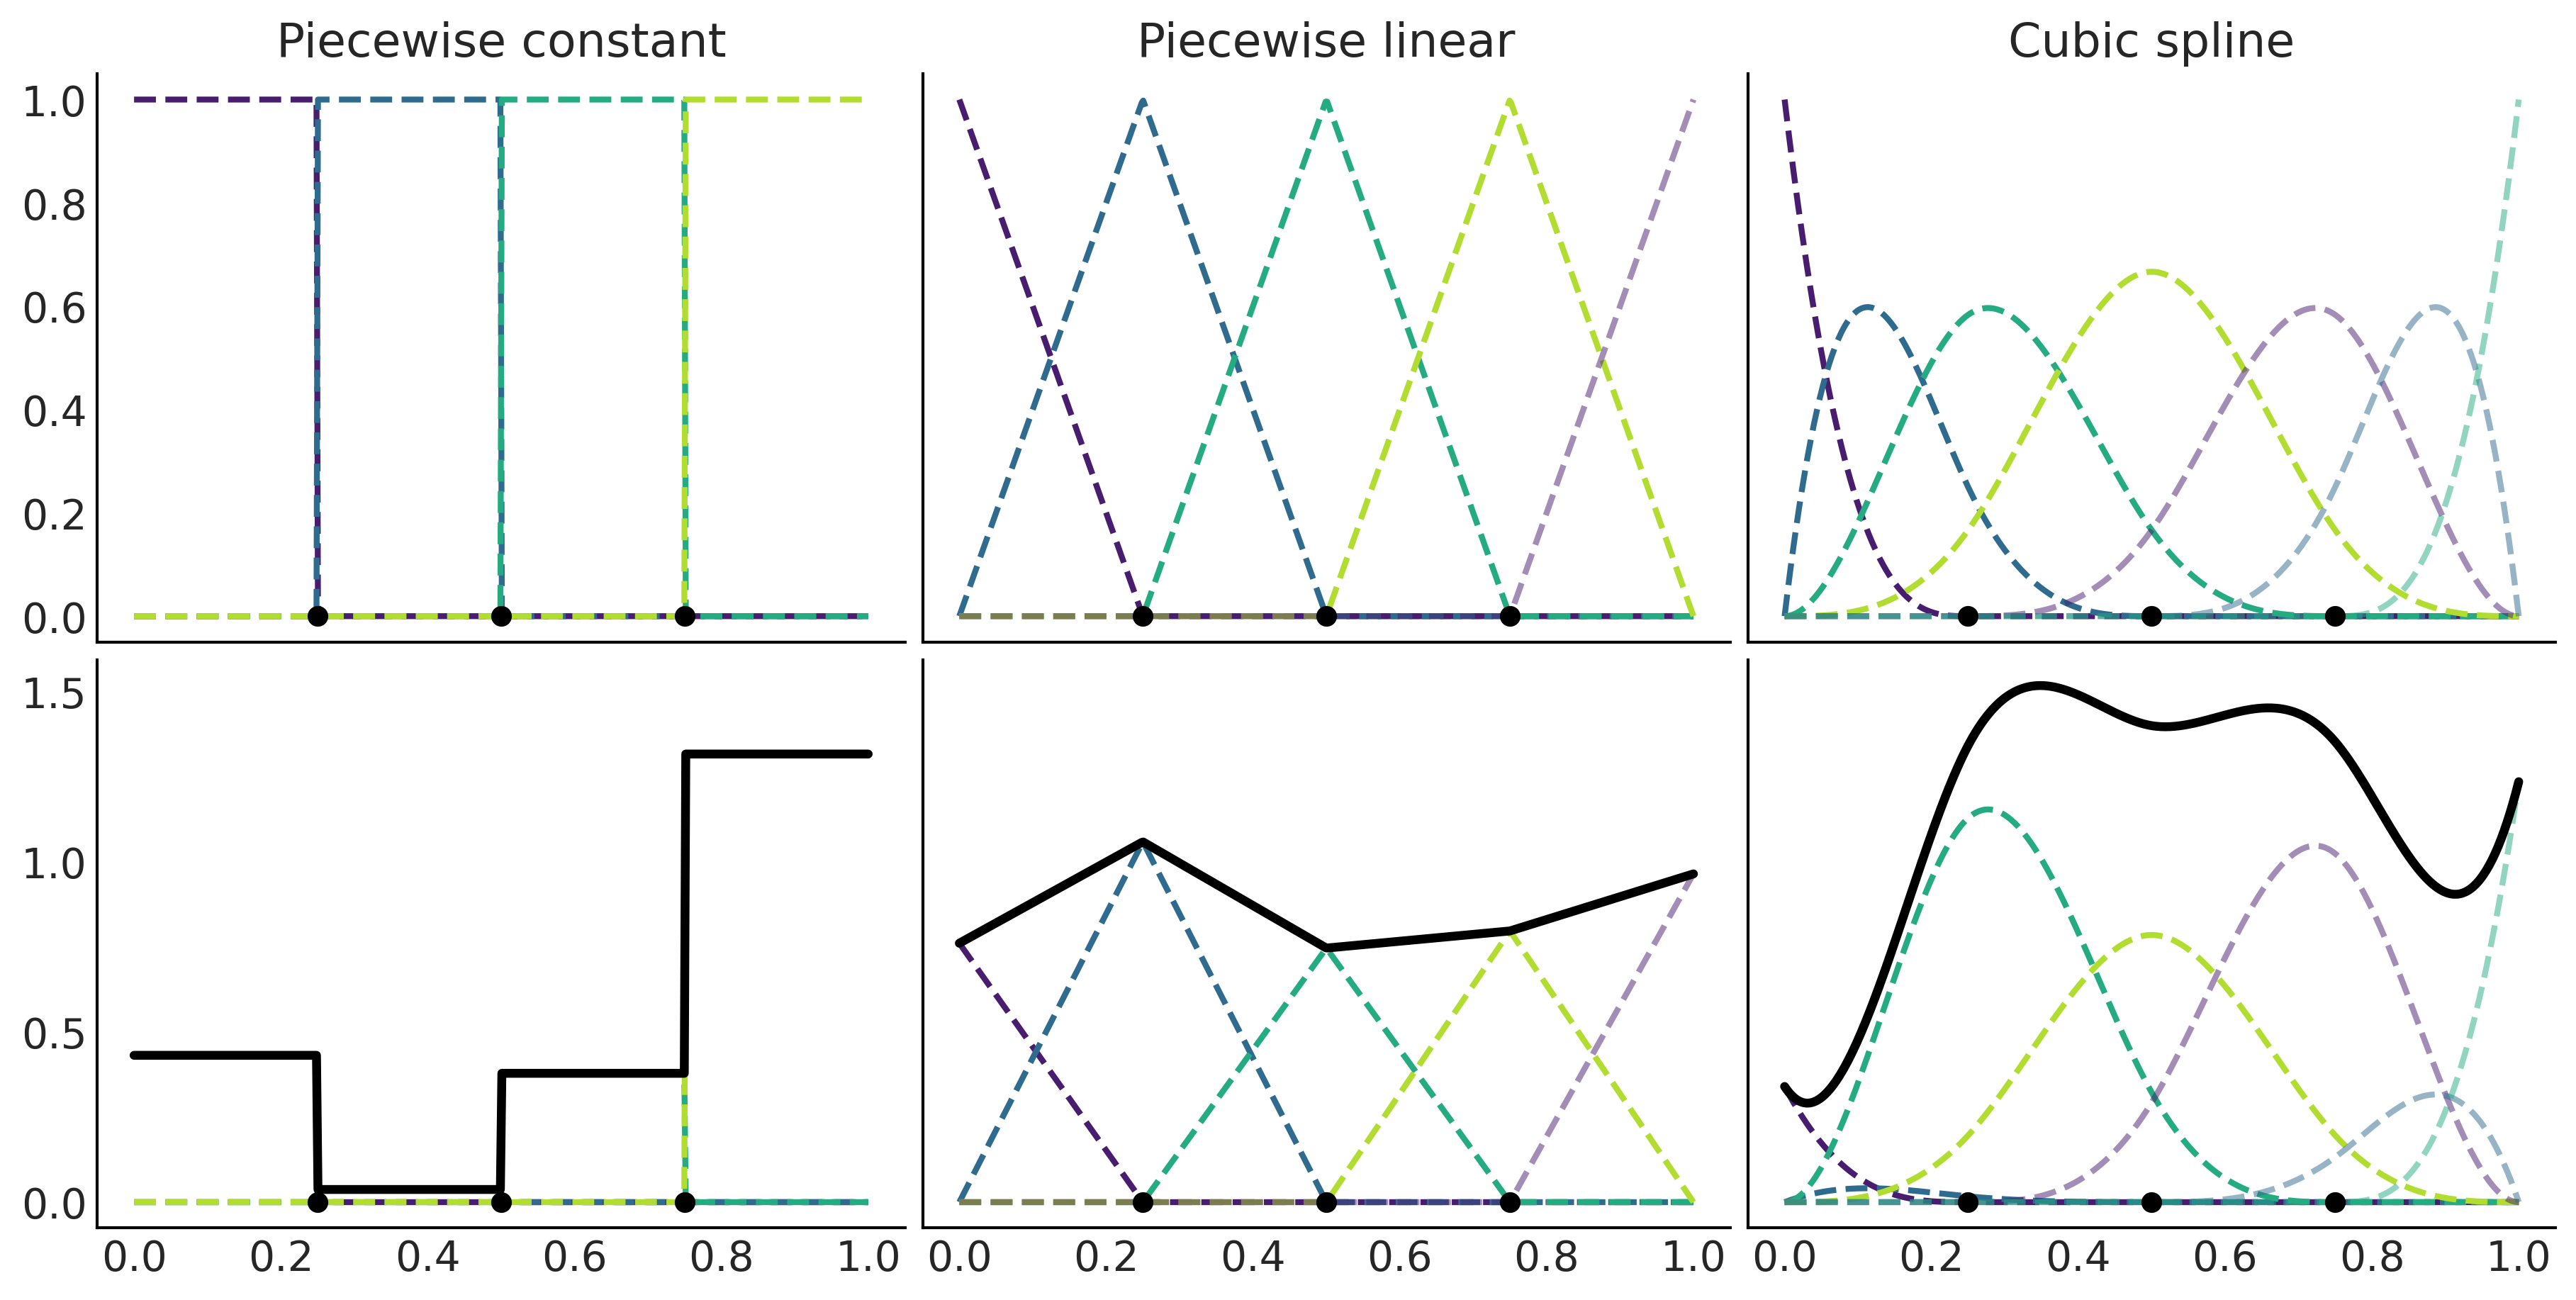

In [8]:
x = np.linspace(0., 1., 500)
knots = [0.25, 0.5, 0.75]

B0 = dmatrix("bs(x, knots=knots, degree=0, include_intercept=True) - 1", 
             {"x": x, "knots":knots})
B1 = dmatrix("bs(x, knots=knots, degree=1, include_intercept=True) - 1",
             {"x": x, "knots":knots})
B3 = dmatrix("bs(x, knots=knots, degree=3,include_intercept=True) - 1",
             {"x": x, "knots":knots})

np.random.seed(1563)
_, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey='row')
for idx, (B, title) in enumerate(zip((B0, B1, B3),
                                     ("Piecewise constant",
                                      "Piecewise linear",
                                      "Cubic spline"))):
    # plot spline basis functions
    for i in range(B.shape[1]):
        axes[0, idx].plot(x, B[:, i],
                          color=viridish[i], lw=2, ls="--")
    # we generate some positive random coefficients 
    # there is nothing wrong with negative values
    β = np.abs(np.random.normal(0, 1, size=B.shape[1]))
    # plot spline basis functions scaled by its β
    for i in range(B.shape[1]):
        axes[1, idx].plot(x, B[:, i]*β[i],
                          color=viridish[i], lw=2, ls="--")
    # plot the sum of the basis functions
    axes[1, idx].plot(x, np.dot(B, β), color='k', lw=3)
    # plot the knots
    axes[0, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[1, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[0, idx].set_title(title)

以上使用Patsy定义了B样条线。在第一行，我们可以看到增加阶数的样条线1（分段常数）、2（分段线性）和4（立方）用灰色虚线表示。为了清晰，每个基函数都用不同的颜色表示。在第二行，我们有第一行的基样条线通过一组系数进行缩放。粗黑线表示这些基函数的和。因为系数的值是随机选择的，我们可以将第二行的每个子面板看作是样条线空间上的先验分布的随机样本。

## 5.4.用 Pasty 构建设计矩阵

以上绘制了B样条线，但没有说明如何计算它们。主要原因是计算可能很繁琐，而且在像Scipy这样的包中已经有了有效的算法。因此，我们不会讨论如何从头开始计算B样条线，而是依赖于Patsy，这是一个用于描述统计模型的包，特别是线性模型，或者有线性组件的模型，并构建设计矩阵。它深受R编程语言生态系统中广泛使用的 *formula mini-language* 启发。一个有两个协变量的线性模型可表示为`"y ~ x1 + x2"`，如果我们想要添加一个交互作用，我们可以写为`"y ~ x1 + x2 + x1:x2"`。更多的细节请查看patsy文档。   
   
在Patsy中，我们需要向`dmatrix`函数传递一个以 `bs()`开始的字符串来定义基样条设计矩阵，而这个particle虽然是一个字符串，但是被Patsy解析为一个函数。因此，它也可以接受几个参数，包括数据，一个表示节点位置的类数组，以及样条的度。在以下代码块中，我们定义了3个设计矩阵，一个是度为0的（分段常数），另一个是度为1的（分段线性），最后一个是度为3的（立方样条）。   

```python
x = np.linspace(0., 1., 500)
knots = [0.25, 0.5, 0.75]

B0 = dmatrix("bs(x, knots=knots, degree=0, include_intercept=True) - 1", 
             {"x": x, "knots":knots})
B1 = dmatrix("bs(x, knots=knots, degree=1, include_intercept=True) - 1",
             {"x": x, "knots":knots})
B3 = dmatrix("bs(x, knots=knots, degree=3,include_intercept=True) - 1",
             {"x": x, "knots":knots})

fig, axes = plt.subplots(1, 3, sharey=True)
for idx, (B, title, ax) in enumerate(zip((B0, B1, B3),
                                     ("Piecewise constant", 
                                      "Piecewise linear", 
                                      "Cubic spline"),
                                      axes)):
    cax = ax.imshow(B, cmap="cet_gray_r", aspect="auto")
    ax.set_xticks(np.arange(B.shape[1]))
    ax.set_yticks(np.arange(B.shape[0]))
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(title)

axes[1].set_xlabel("b-splines")
axes[0].set_ylabel("x", rotation=0, labelpad=15)
fig.colorbar(cax, aspect=40, ticks=[0, 0.5, 1])
```

![](design_matrices.png)

## 5.5. 基于PyMC拟合样条线

以下使用来自加州大学欧文分校机器学习存储库的自行车共享系统的数据集。我们将估计24小时周期内各小时单车出租数量。

In [11]:
data = pd.read_csv("../data/bikes_hour.csv")
data.sort_values(by="hour", inplace=True)

# We standardize the response variable
data_cnt_om = data["count"].mean()
data_cnt_os = data["count"].std()
data["count_normalized"] = (data["count"] - data_cnt_om) / data_cnt_os
# Remove data, you may later try to refit the model to the whole data
data = data[::50]

Text(0, 0.5, 'count_normalized')

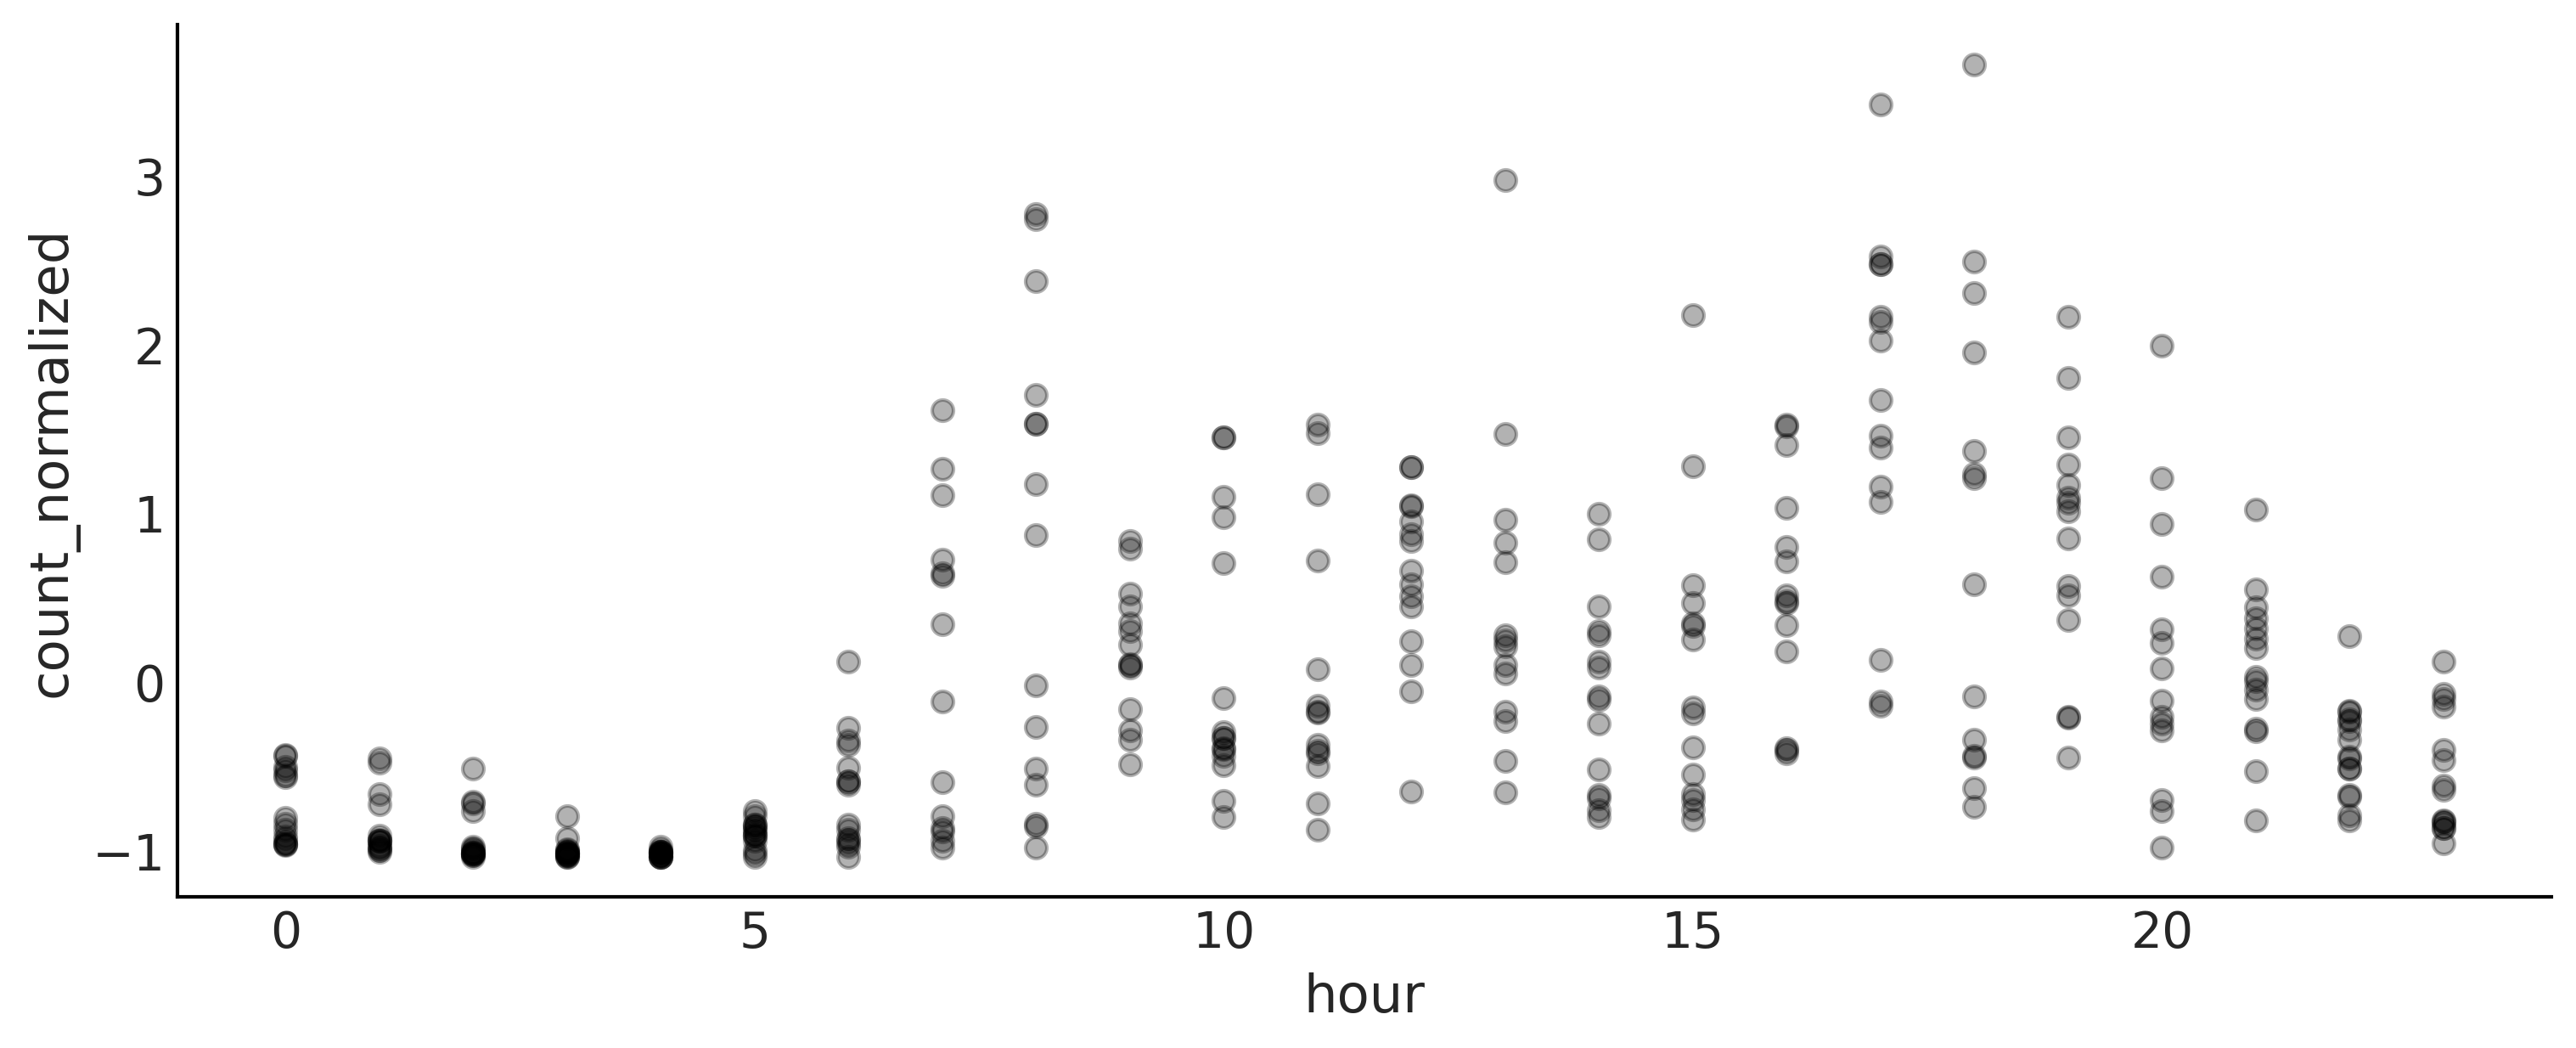

In [12]:
_, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(data.hour, data.count_normalized, "o", alpha=0.3)
ax.set_xlabel("hour")
ax.set_ylabel("count_normalized")

上图看起来，不同时间段单车出租数量的分布不同，因此我们可以使用样条线来拟合这些数据。我们选择6个节点来均分：

In [17]:
num_knots = 6
knot_list = np.linspace(0, 23, num_knots+2)[1:-1]

然后使用 Patsy 定义和构建设计矩阵

In [125]:
B = dmatrix(
    "bs(cnt, knots=knots, degree=3, include_intercept=True) - 1",
    {"cnt": data.hour.values, "knots": knot_list[1:-1]})

统计模型为：
$$
\begin{aligned}
\begin{split}
    \tau \sim& \; \mathcal{HC}(1) \\
    \boldsymbol{\beta} \sim& \; \mathcal{N}(0, \tau) \\
    \sigma \sim& \; \mathcal{HN}(1) \\
    Y \sim& \; \mathcal{N}(\boldsymbol{B}(X)\boldsymbol{\beta},\sigma)
\end{split}\end{aligned}
$$

以上样条线回归模型与线性模型很像。最困难的工作已经通过设计矩阵 $\boldsymbol{B}$ 和它的扩展特征空间解决了。

In [22]:
with pm.Model() as splines:
    τ = pm.HalfCauchy('τ', 1) 
    β = pm.Normal("β", mu=0, sigma=τ, shape=B.shape[1])
    μ = pm.Deterministic("μ", pm.math.dot(np.asfortranarray(B), β))
    σ = pm.HalfNormal("σ", 1)
    c = pm.Normal("c", μ, σ, observed=data["count_normalized"].values)
    idata_s = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, β, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


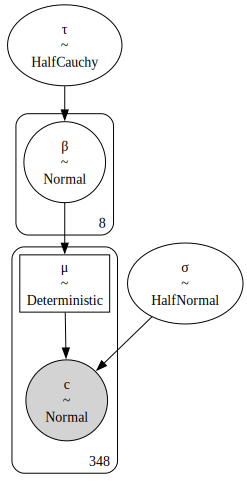

In [54]:
pm.model_to_graphviz(splines)

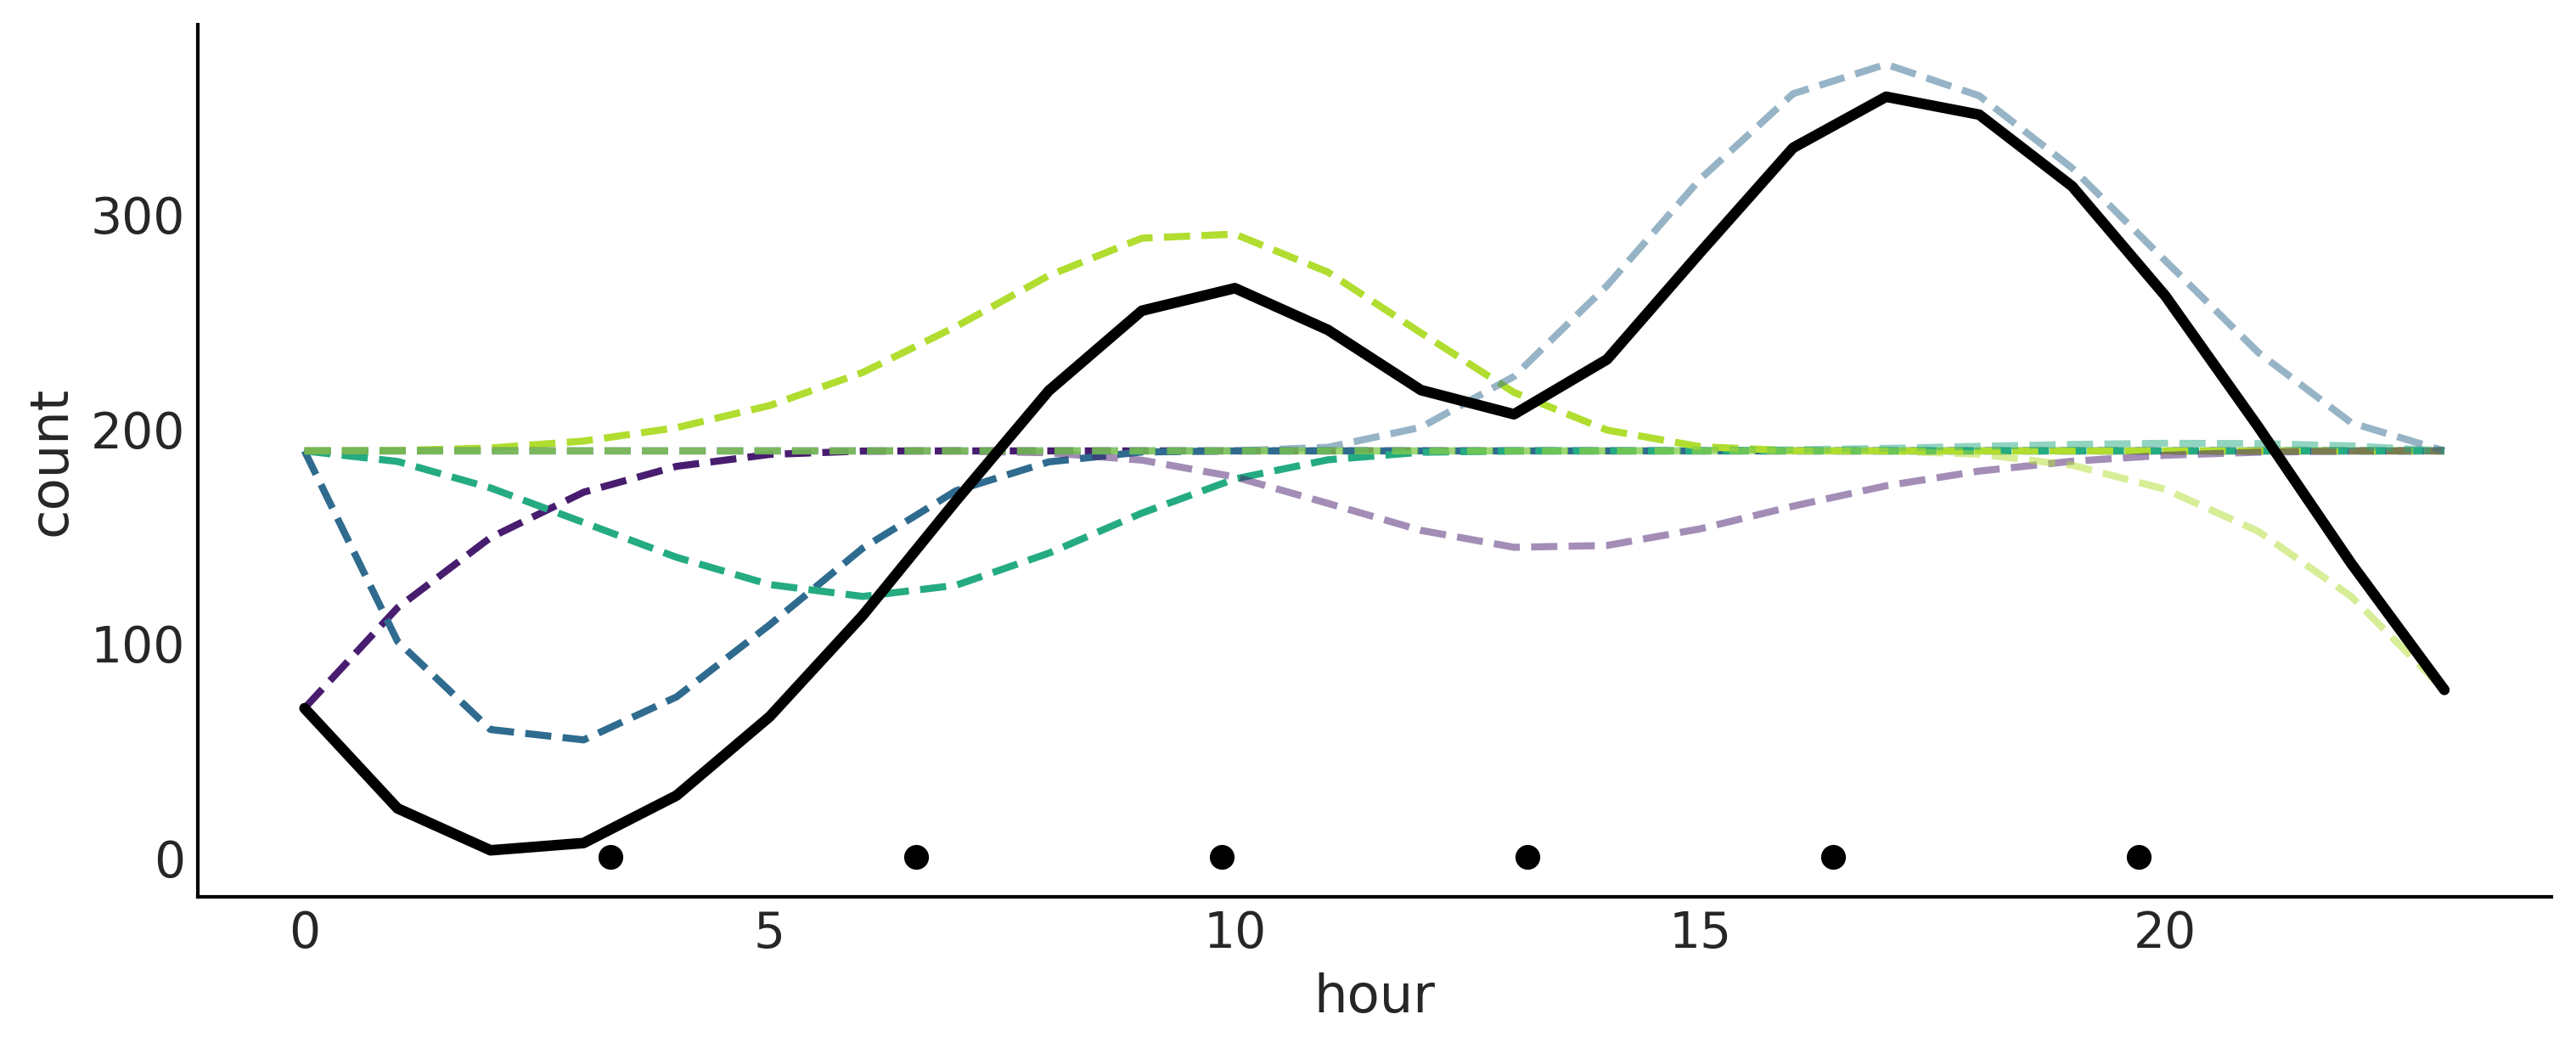

In [127]:
_, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_prop_cycle(cycler('color', viridish))
posterior = idata_s.posterior.stack(samples=['chain', 'draw'])
ax.plot(data.hour, (B*posterior["β"].mean("samples").values * data_cnt_os) + data_cnt_om, lw=2, ls='--')
ax.plot(data.hour, posterior["μ"].mean("samples") * data_cnt_os + data_cnt_om, 'k', lw=3)
ax.set_xlabel("hour")
ax.set_ylabel("count")
ax.plot(knot_list, np.zeros_like(knot_list), 'ko')

使用重叠样条曲线及其不确定性来绘制数据，结果会更加明显。从这个图中我们不难看出，深夜时租赁自行车的数量是最低的。然后可能会随着人们起床去上班而增加。我们在 10 点左右出现第一个高峰，随后趋于平稳，或者可能略有下降，然后随着人们在 18 点左右上下班回家，出现第二个高峰，此后出现稳定下降。

/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'count')

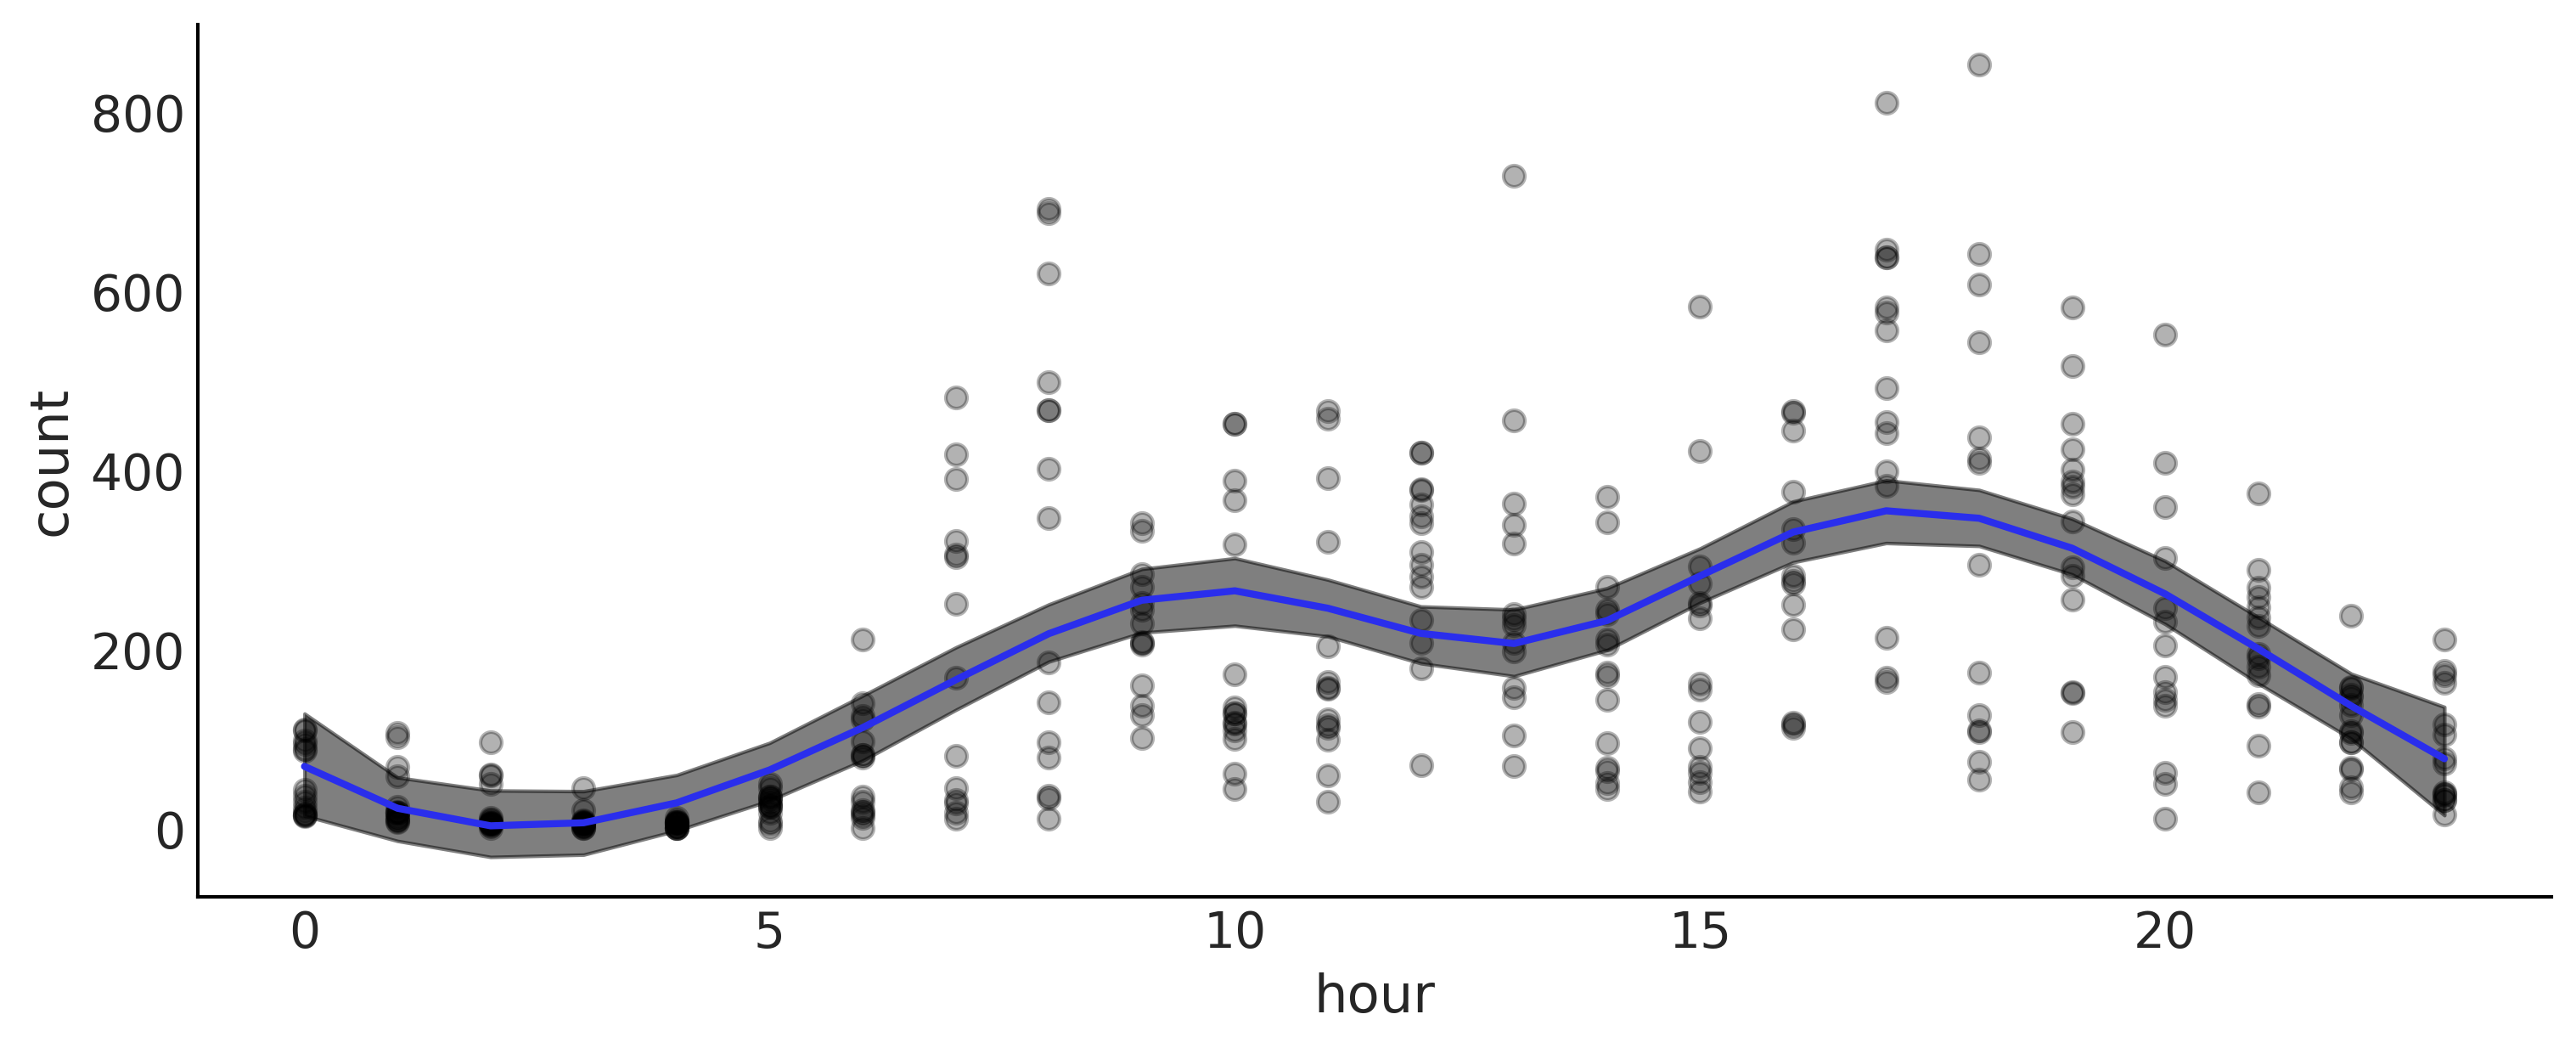

In [45]:
_, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(data.hour, data["count"], "o", alpha=0.3, zorder=-1)
# we use data_cnt_os and data_cnt_om to rescale the cnt data and results
ax.plot(data.hour, (posterior["μ"].mean("samples")  * data_cnt_os) + data_cnt_om, color="C4", lw=2)
az.plot_hdi(data.hour, (posterior["μ"].T  * data_cnt_os) + data_cnt_om,
            color="C0", smooth=False)
ax.set_xlabel("hour")
ax.set_ylabel("count")

在这个自行车租赁的例子中，我们正在处理一个循环变量，也就是说第0小时等于第24小时。这对我们来说可能很明显，但是对我们的模型来说肯定不明显。Patsy提供了一个简单的解决方案来告诉我们的模型这个变量是循环的。我们可以使用`cc`来定义设计矩阵，而不是使用`bs`，这是一个*circular-aware*的立方样条。

## 5.6. 为样条线选择结 Knots 和先验 Prior

使用养条线建模是我们需要选择 knots 的数量和位置。我们依然可以使用 LOO 来比较哪种选择更好。以下分别使用 3，6，9，12 和 18 个 knots 来拟合数据，然后使用 LOO 比较它们。可以发现12个 Knots 效果最好。

![](knots_select_loo.jpg)

一种有效的建议是根据分位数来划分 knots 而不是均分。比如 `knot_list = np.quantile(data.hour, np.linspace(0, 1, num_knots))` 。通过这种方式，我们将在数据较多的地方放置更多的 knots，在数据较少的地方放置更少的 knots。让数据更丰富部分的更灵活的近似。

### 5.6.1. 样条的正则化先验

选择太少的节点可能会导致欠拟合，选择太多的节点可能会导致过拟合，因此我们可能希望使用*相当大*的节点数量，然后选择一个正则化先验。从样条的定义和上图我们可以看到，连续的 $\boldsymbol{\beta}$ 系数越接近彼此，得到的函数就会越平滑。想象一下，如果你在上图的设计矩阵中删除了两列连续的列，实际上将这些系数设置为 0，拟合将会变得不够*平滑*，因为我们在预测器中没有足够的信息来覆盖某个子区域（回想一下，样条是*局部的*）。因此，我们可以通过为 $\boldsymbol{\beta}$ 系数选择一个先验，使得 $\beta_{i+1}$ 的值与 $\beta_{i}$ 的值相关，从而得到更平滑的拟合回归线:

$$
\begin{aligned}
\begin{split}
\beta_i \sim& \mathcal{N}(0, 1) \\
\tau\sim& \mathcal{N}(0,1) \\
\beta \sim& \mathcal{N}(\beta_{i-1}, \tau) 
\end{split}\end{aligned}
$$

通过 PyMC 我们可以用高斯随机过程来表达：

$$
\begin{aligned}
\begin{split}
\tau\sim& \mathcal{N}(0, 1) \\
\beta \sim& \mathcal{G}RW(\beta, \tau) 
\end{split}\end{aligned}
$$

我们基于高斯随机过程来建模：

In [129]:
knot_list = np.arange(1, 23)

B = dmatrix(
    "bs(cnt, knots=knots, degree=3, include_intercept=True) - 1",
    {"cnt": data.hour.values, "knots": knot_list},
)

with pm.Model() as splines_rw:
    τ = pm.HalfCauchy('τ', 1) 
    β = pm.GaussianRandomWalk("β", mu=0, sigma=τ, shape=B.shape[1])
    μ = pm.Deterministic("μ", pm.math.dot(np.asfortranarray(B), β))
    σ = pm.HalfNormal("σ", 1)
    c = pm.Normal("c", μ, σ, observed=data["count_normalized"].values)
    idata_splines_rw = pm.sample(1000)
    idata_splines_rw.extend(pm.sample_posterior_predictive(idata_splines_rw))

/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/pymc/distributions/timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, β, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
Sampling: [c]


对比普通正态先验：

In [139]:
with pm.Model() as wiggly:
    τ = pm.HalfCauchy('τ', 1) 
    β = pm.Normal("β", mu=0, sigma=τ, shape=B.shape[1])
    μ = pm.Deterministic("μ", pm.math.dot(np.asfortranarray(B), β))
    σ = pm.HalfNormal("σ", 1)
    c = pm.Normal("c", μ, σ, observed=data["count_normalized"].values)
    idata_wiggly = pm.sample(1000)
    idata_wiggly.extend(pm.sample_posterior_predictive(idata_wiggly))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, β, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


Text(0, 0.5, 'count')

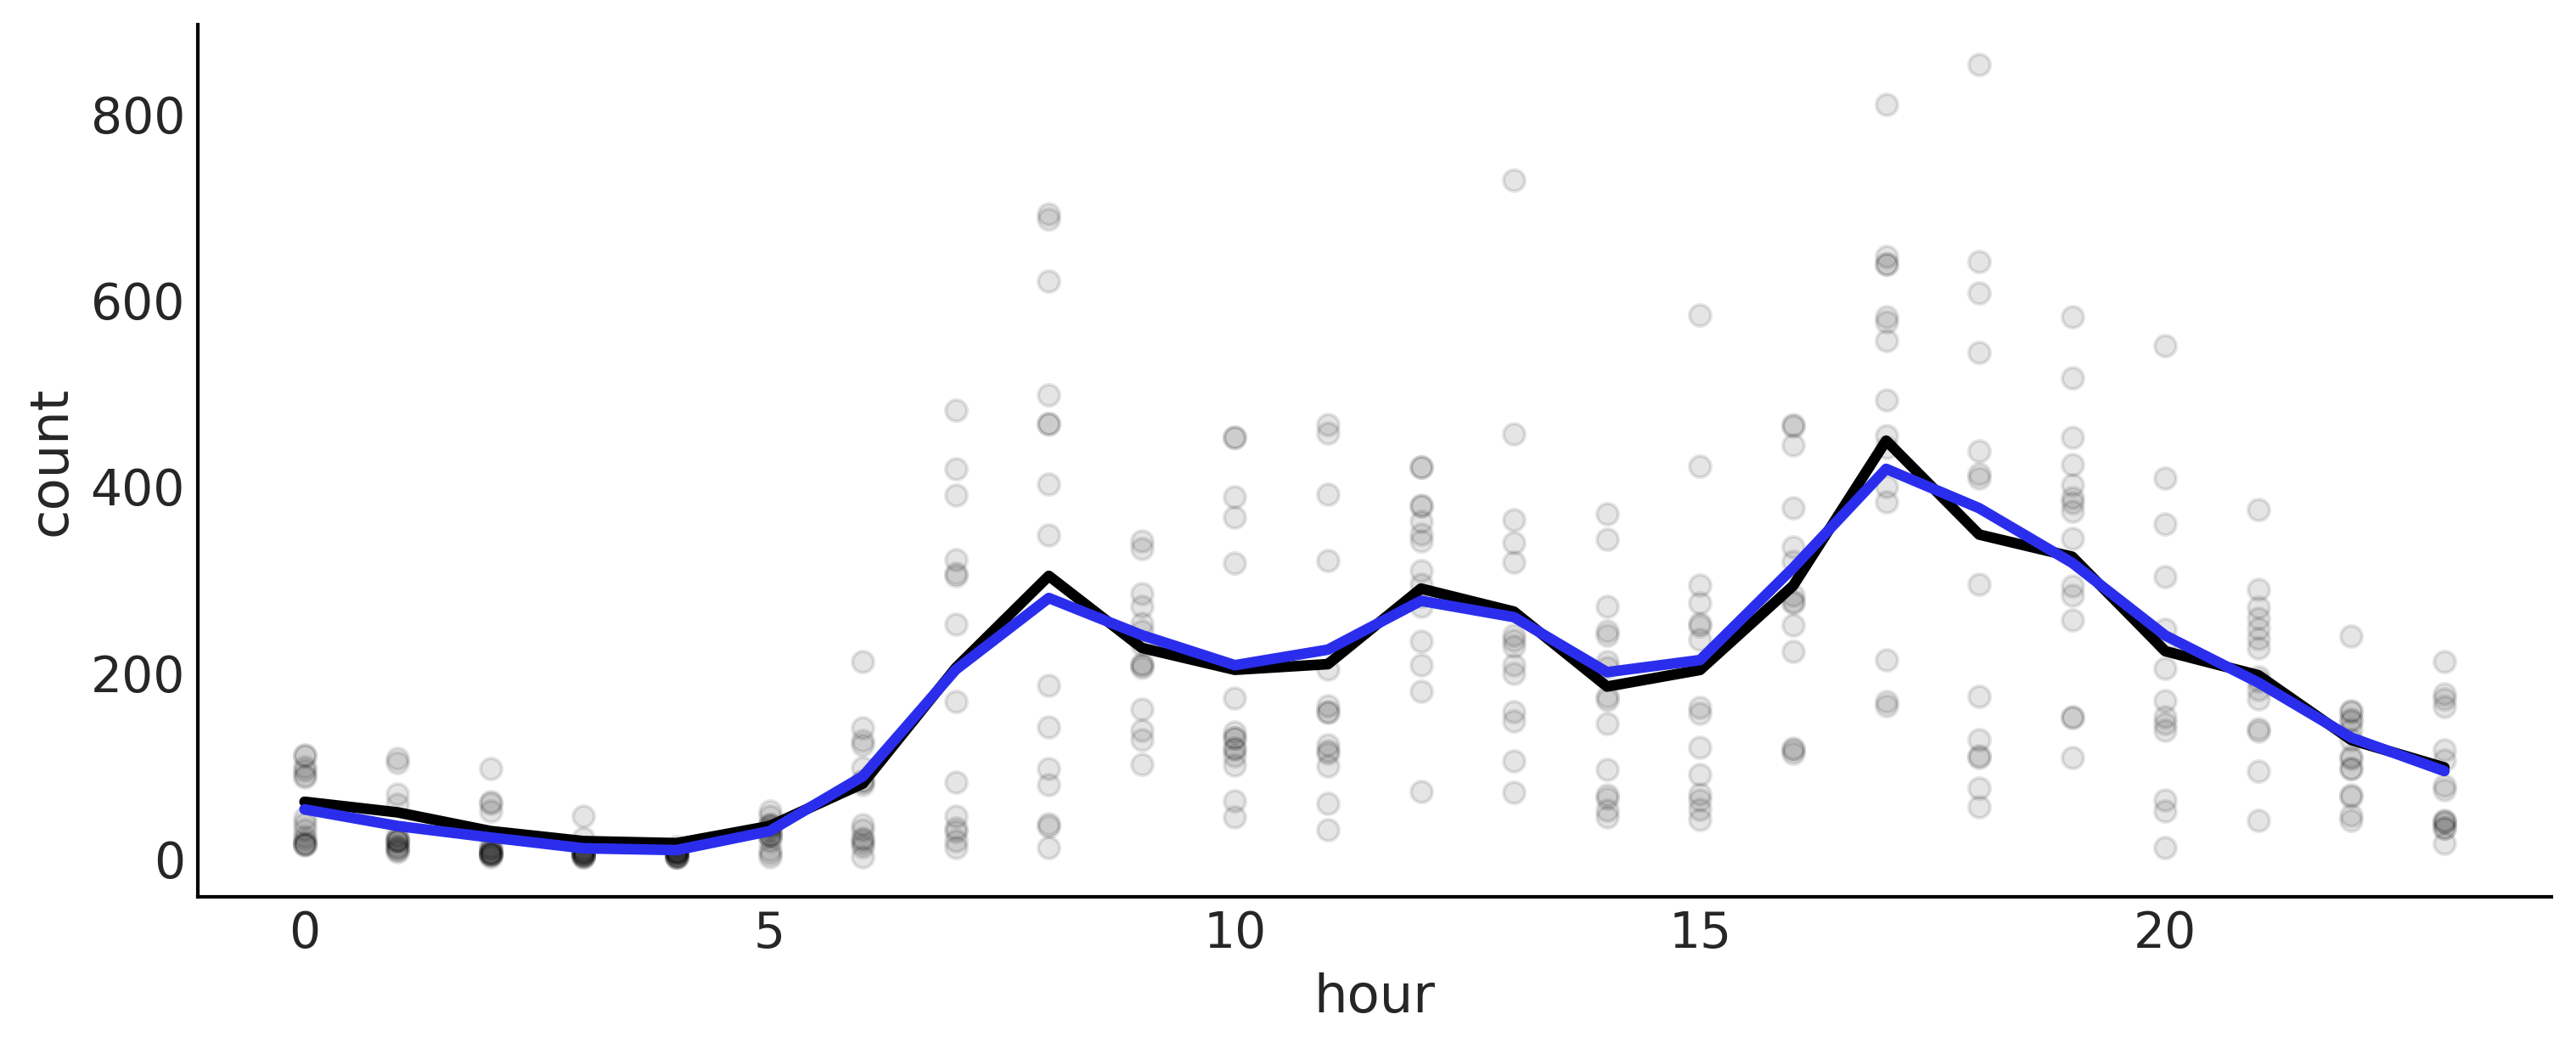

In [150]:
_, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(data.hour, data["count"], "o", alpha=0.1, zorder=-1)

wiggly_posterior = (idata_wiggly.posterior["μ"] * data_cnt_os) + data_cnt_om
mean_f = wiggly_posterior.mean(dim=['chain', 'draw'])
ax.plot(data.hour, mean_f , color="C0", lw=3)

splines_rw = (idata_splines_rw.posterior["μ"] * data_cnt_os) + data_cnt_om
mean_f = splines_rw.mean(dim=['chain', 'draw'])
ax.plot(data.hour, mean_f, color="C4", lw=3)

ax.set_xlabel("hour")
ax.set_ylabel("count")

我们可以看到，具有平滑先验的样条模型 splines_rw 的样条均值函数（蓝线）比没有平滑先验的样条均值函数（黑色）要平滑，尽管我们承认差异似乎相当小。

# 5.7. 用样条线对二氧化碳吸收建模

一个实验测量了 12 种不同植物在不同条件下的二氧化碳吸收量。这里我们只探讨外部CO2浓度的影响，即环境中的CO2浓度如何影响不同植物对CO2的消耗。在 7 个 CO2 浓度下测量了每株植物的 CO2 吸收量，12 株植物中的每一株都有相同的 7 个值。让我们从加载和整理数据开始。

In [151]:
plants_CO2 = pd.read_csv("../data/CO2_uptake.csv")
plant_names = plants_CO2.Plant.unique()

# Index the first 7 CO2 measurements per plant
CO2_conc = plants_CO2.conc.values[:7]

# Get full array which are the 7 measurements above repeated 12 times
CO2_concs = plants_CO2.conc.values
uptake = plants_CO2.uptake.values

index = range(12)
groups = len(index)

In [161]:
plants_CO2

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3
...,...,...,...,...,...
79,Mc3,Mississippi,chilled,250,17.9
80,Mc3,Mississippi,chilled,350,17.9
81,Mc3,Mississippi,chilled,500,17.9
82,Mc3,Mississippi,chilled,675,18.9


我们将要拟合的第一个模型是具有单一响应曲线的模型，即假设所有12株植物的响应曲线是相同的。我们首先使用 Patsy 定义设计矩阵，就像我们之前做的那样。我们设置 `num_knots=2`，因为我们每株植物有7个观察值，所以相对较少的节点应该可以工作得很好。`CO2_concs` 是一个列表，值为 `[95, 175, 250, 350, 500, 675, 1000]`，每株植物重复一次，共12次。

In [158]:
num_knots = 2
knot_list = np.linspace(CO2_conc[0], CO2_conc[-1], num_knots+2)[1:-1]

Bg = dmatrix(
    "bs(conc, knots=knots, degree=3, include_intercept=True) - 1",
    {"conc": CO2_concs, "knots": knot_list},
)

这个问题看起来类似于前面章节的自行车租赁问题，因此我们可以开始应用相同的模型。

In [165]:
with pm.Model() as sp_global:
    τ = pm.HalfCauchy('τ', 1)
    β = pm.Normal("β", mu=0, sigma=τ, shape=Bg.shape[1])
    μg = pm.Deterministic("μg", pm.math.dot(np.asfortranarray(Bg), β))
    σ = pm.HalfNormal("σ", 1)
    up = pm.Normal("up", μg, σ, observed=uptake)
    idata_sp_global = pm.sample(3000, tune=2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, β, σ]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 29 seconds.


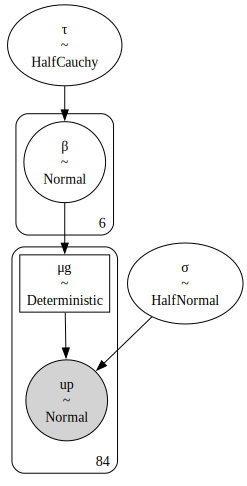

In [170]:
pm.model_to_graphviz(sp_global)

/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **h

Text(-0.03, 0.4, 'CO2 uptake')

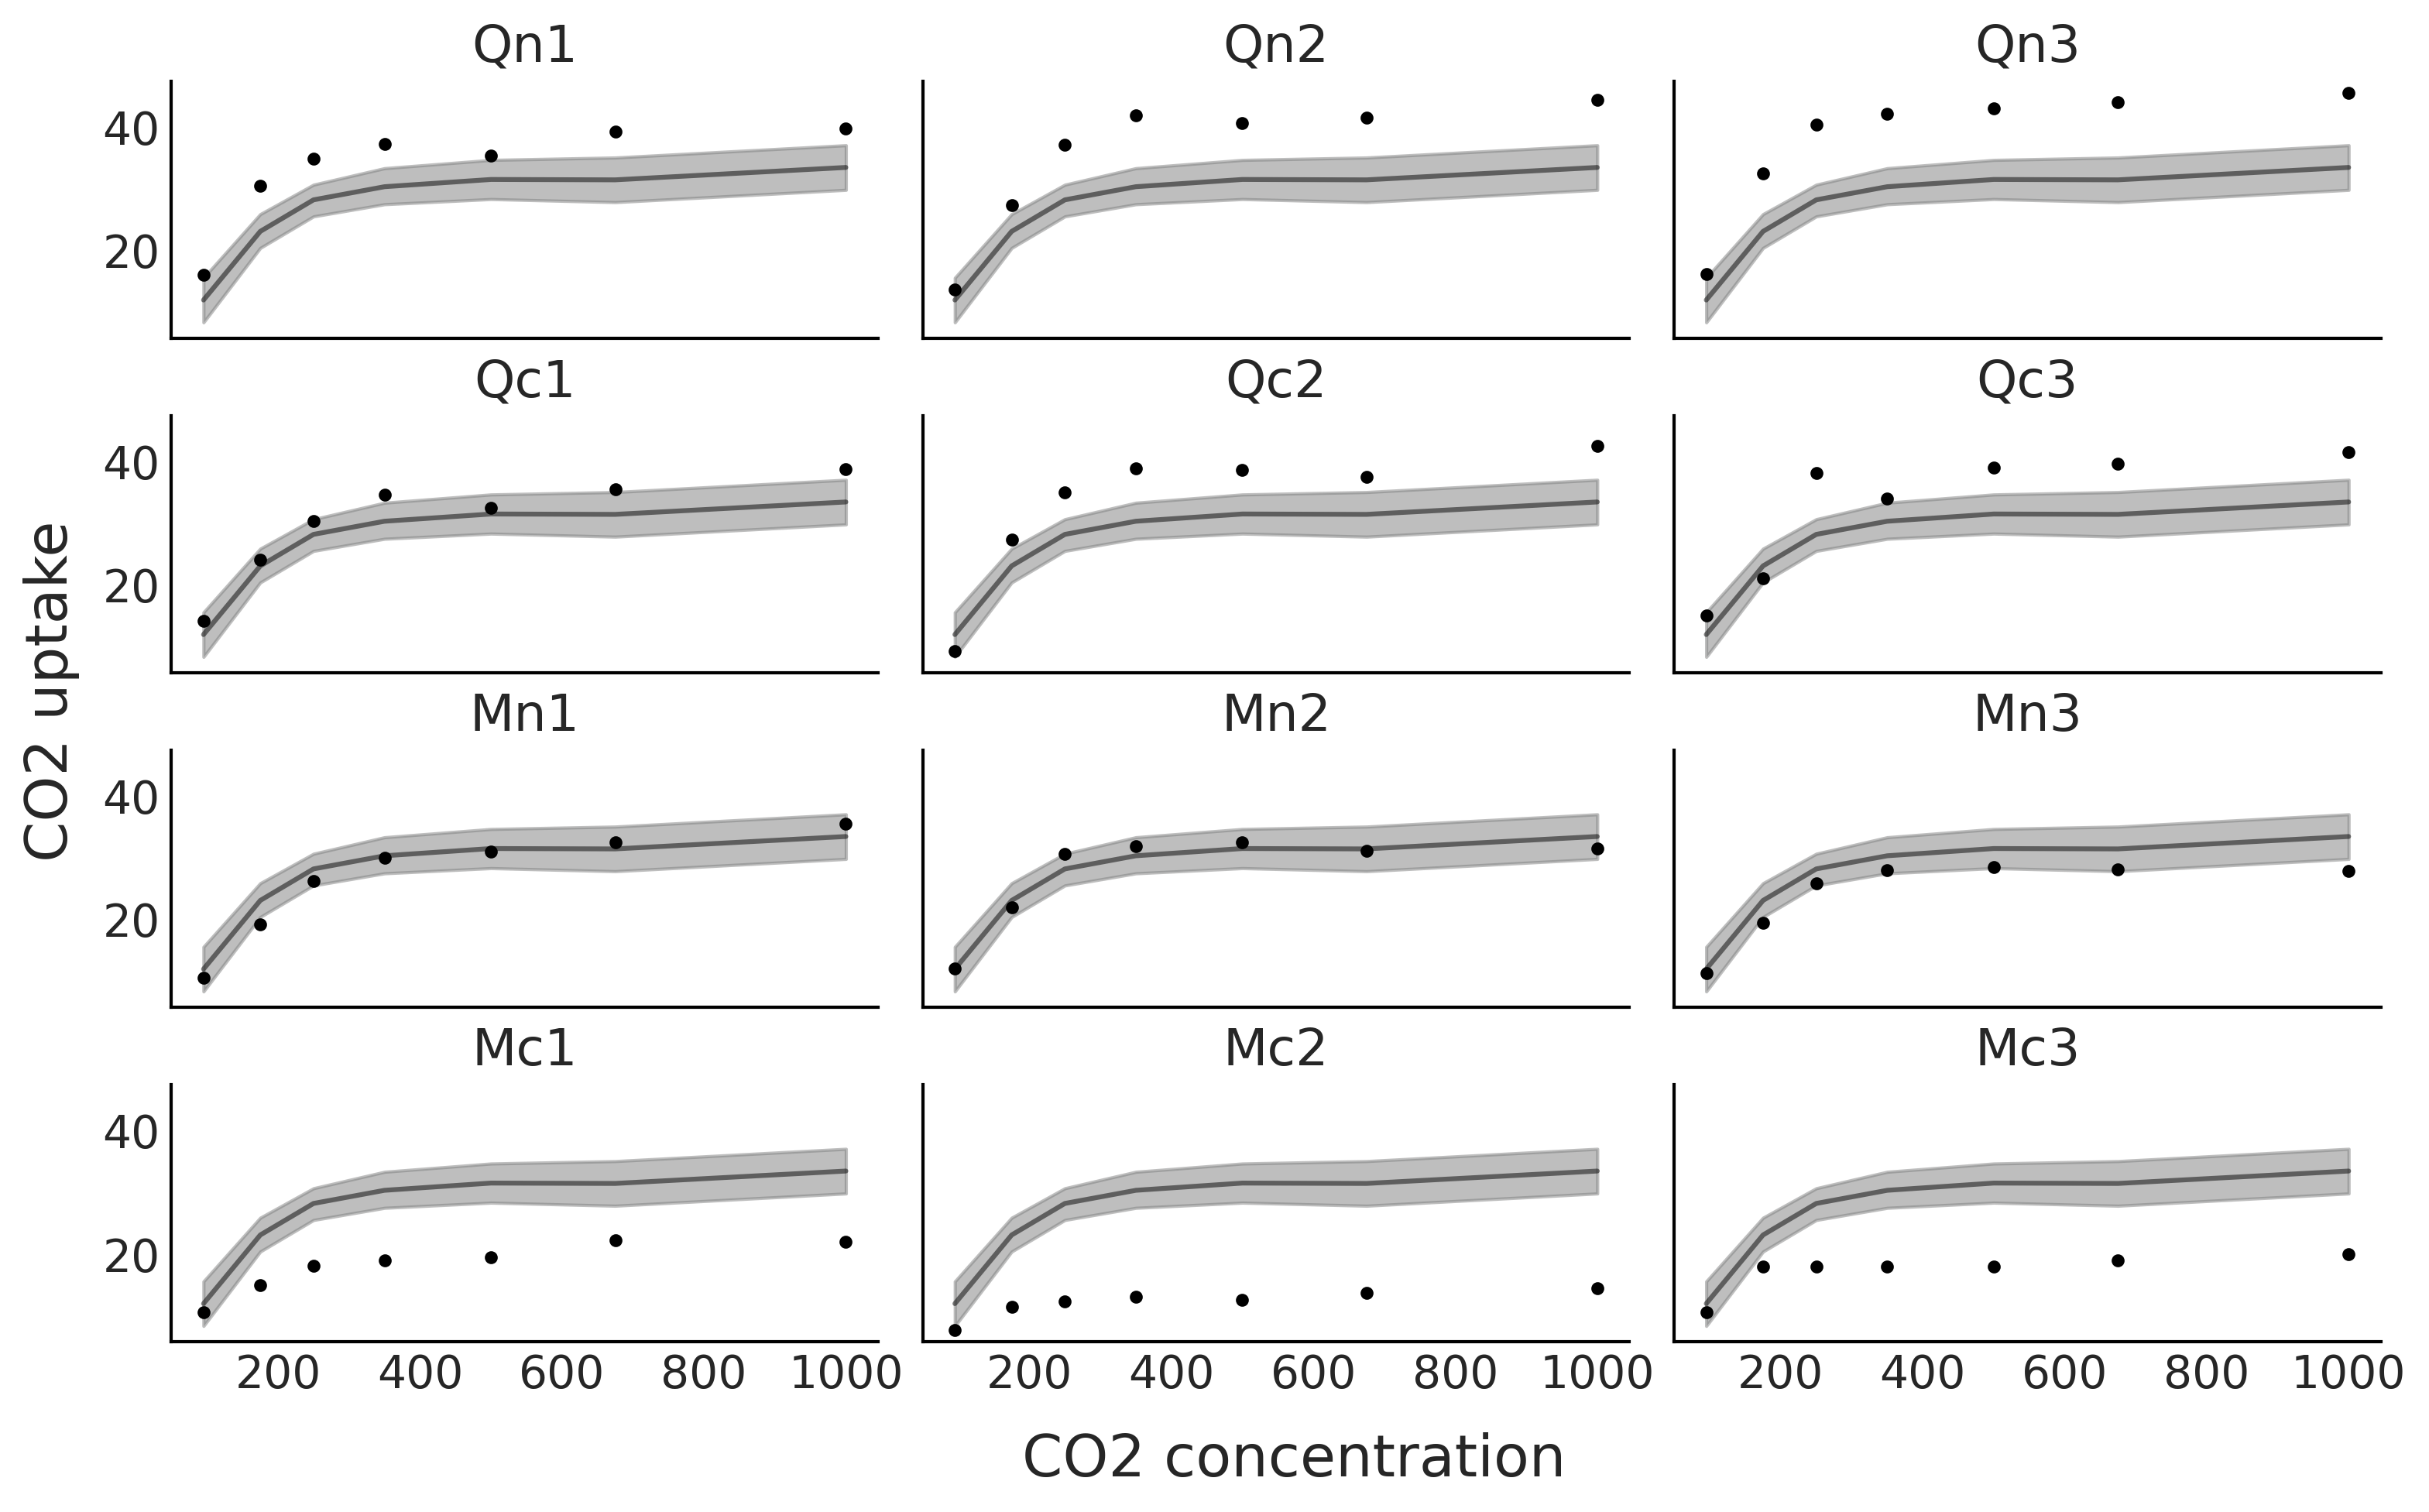

In [166]:
fig, axes = plt.subplots(4, 3, figsize=(10, 6), sharey=True, sharex=True)
μsg = idata_sp_global.posterior.stack(draws=("chain", "draw"))["μg"].values.T
μsg_mean = μsg.mean(0)
for count, (idx, ax) in enumerate(zip(range(0, 84, 7), axes.ravel())):
    ax.plot(CO2_conc, uptake[idx:idx+7], '.', lw=1)
    ax.plot(CO2_conc, μsg_mean[idx:idx+7], "k", alpha=0.5);
    az.plot_hdi(CO2_conc, μsg[:,idx:idx+7], color="C2", smooth=False, ax=ax)
    ax.set_title(plant_names[count])
    
fig.text(0.4, -0.05, "CO2 concentration", size=18)
fig.text(-0.03, 0.4, "CO2 uptake", size=18, rotation=90)

上图中黑点代表了植物在七个CO₂浓度下测量的CO₂吸收量。黑线是代码块 sp_global 中模型的平均样条拟合，灰色阴影曲线代表该拟合的94% HDI区间。    
    
现在让我们尝试使用每个植物具有不同响应的模型，为此我们用 `CO2_conc = [95,  175,  250,  350,  500,  675, 1000]` 定义设计矩阵 `Bi`，`Bi` 是
$7 \times 7$ 矩阵，而 `Bg` 是 $84 \times 7$ 矩阵.

In [177]:
Bi = dmatrix(
    "bs(conc, knots=knots, degree=3, include_intercept=True) - 1",
    {"conc": CO2_conc, "knots": knot_list})

with pm.Model() as sp_individual:
    τ = pm.HalfCauchy('τ', 1)
    βi = pm.Normal("βi", mu=0, sigma=τ, shape=(Bi.shape[1], groups))
    μi = pm.Deterministic("μi", pm.math.dot(np.asfortranarray(Bi), βi))
    σ = pm.HalfNormal("σ", 1)
    up = pm.Normal("up", μi[:,np.asarray(index)].T.ravel(), σ, observed=uptake)
    idata_sp_individual = pm.sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, βi, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 42 seconds.


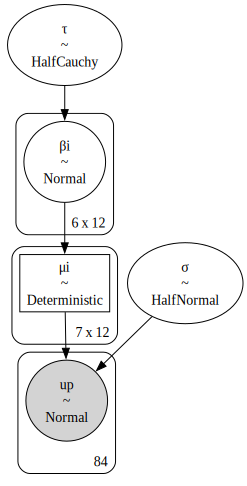

In [178]:
pm.model_to_graphviz(sp_individual)

/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **h

Text(-0.03, 0.4, 'CO2 uptake')

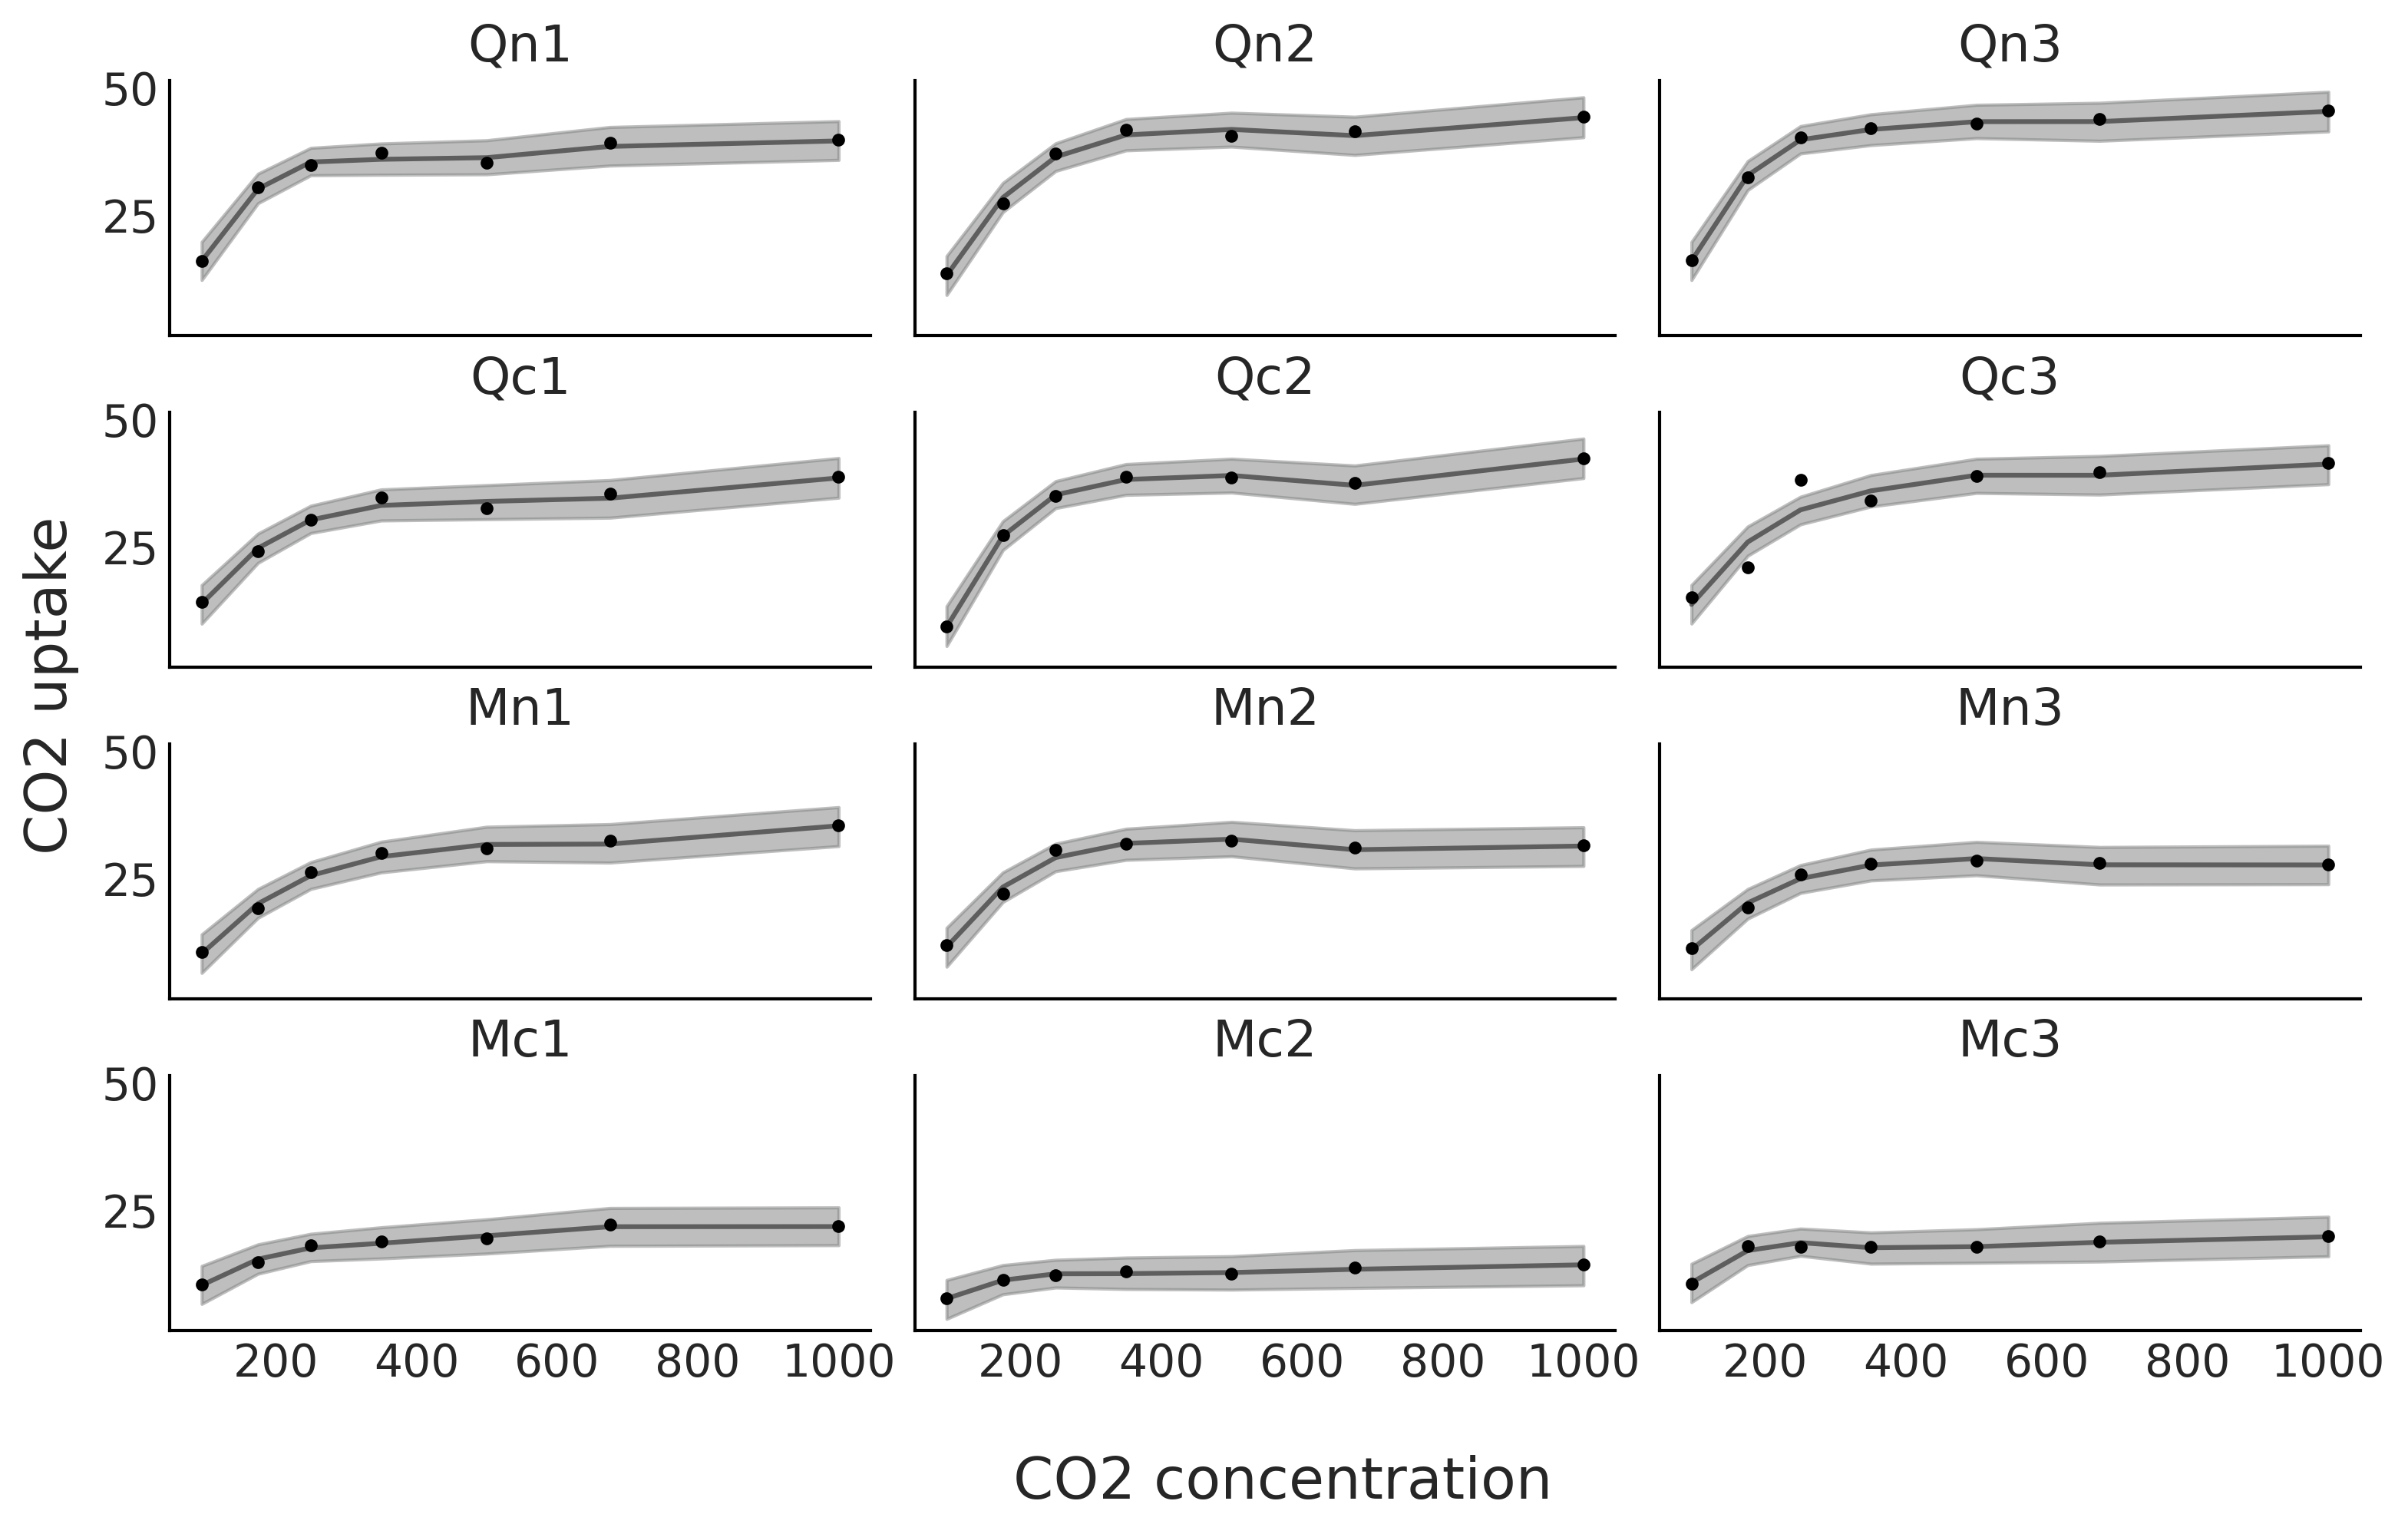

In [179]:
fig, axes = plt.subplots(4, 3, figsize=(10, 6), sharey=True, sharex=True)

μsi = idata_sp_individual.posterior.stack(draws=("chain", "draw"))["μi"].values.T
μsi_mean = μsi.mean(0)
for count, (idx, ax) in enumerate(zip(range(0, 84, 7), axes.ravel())):
    ax.plot(CO2_conc, uptake[idx:idx+7], '.', lw=1)
    ax.plot(CO2_conc, μsi_mean[index[count]], "k", alpha=0.5)
    az.plot_hdi(CO2_conc, μsi[:,index[count]], color="C2", smooth=False, ax=ax)
    ax.set_title(plant_names[count])
    
fig.text(0.4, -0.075, "CO2 concentration", size=18)
fig.text(-0.03, 0.4, "CO2 uptake", size=18, rotation=90)

我们也可以混合使用前两个模型。如果我们想要估计12株植物的全局趋势以及各自的拟合，这可能会很有趣。`sp_mix` 模型使用了之前定义的设计矩阵 `Bg` 和 `Bi`。

In [185]:
with pm.Model() as sp_mix:
    τ = pm.HalfCauchy('τ', 1)
    β = pm.Normal("β", mu=0, sigma=τ, shape=Bg.shape[1])
    μg = pm.Deterministic("μg", pm.math.dot(np.asfortranarray(Bg), β))
    βi = pm.Normal("βi", mu=0, sigma=τ, shape=(Bi.shape[1], groups))
    μi = pm.Deterministic("μi", pm.math.dot(np.asfortranarray(Bi), βi))
    σ = pm.HalfNormal("σ", 1)
    up = pm.Normal("up", μg+μi[:,np.asarray(index)].T.ravel(), σ, observed=uptake)
    idata_sp_mix = pm.sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [τ, β, βi, σ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 70 seconds.


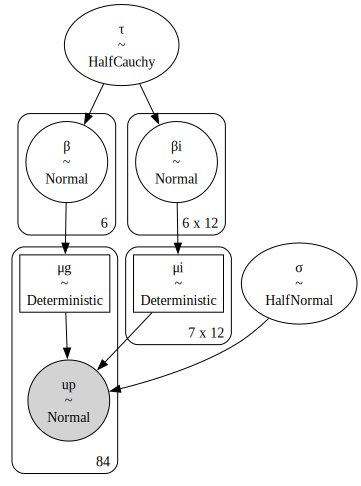

In [186]:
pm.model_to_graphviz(sp_mix)

/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/admin/blog/rock_blog/env/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **h

Text(-0.03, 0.4, 'CO2 uptake')

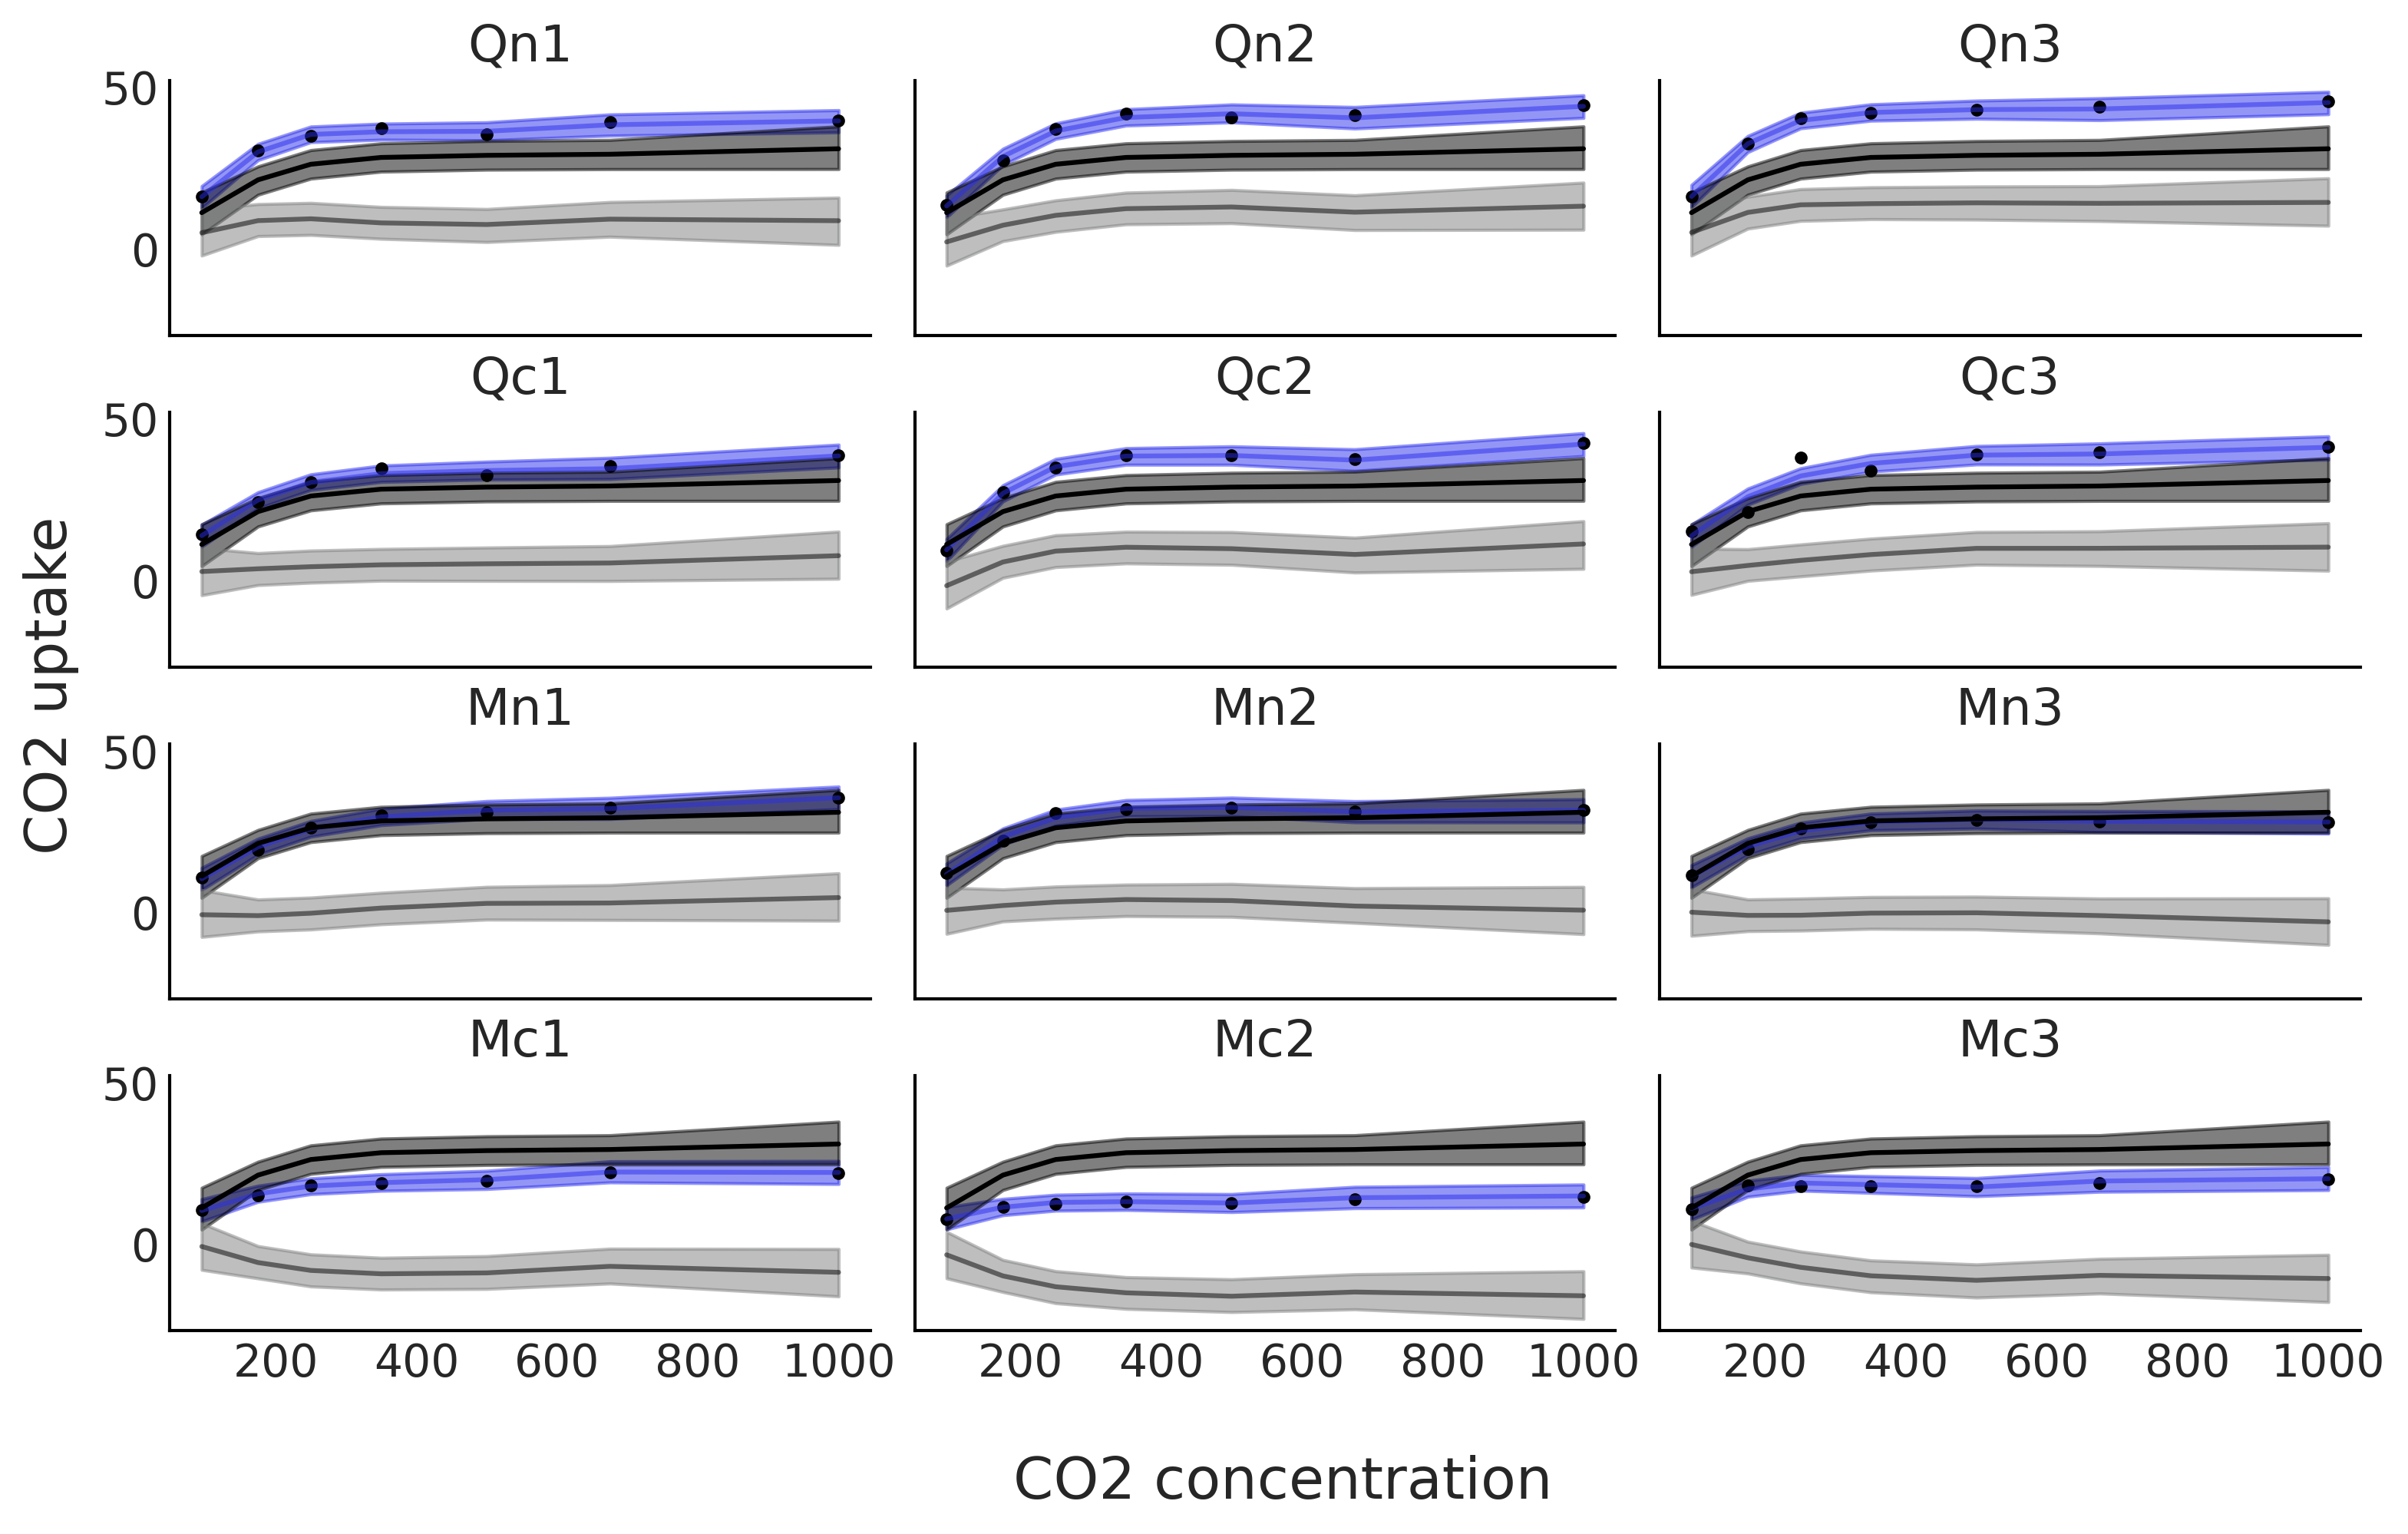

In [187]:
fig, axes = plt.subplots(4, 3, figsize=(10, 6), sharey=True, sharex=True)

μsg = idata_sp_mix.posterior.stack(draws=("chain", "draw"))["μg"].values.T
μsg_mean = μsg.mean(0)

μsi = idata_sp_mix.posterior.stack(draws=("chain", "draw"))["μi"].values.T
μsi_mean = μsi.mean(0)

for count, (idx, ax) in enumerate(zip(range(0, 84, 7), axes.ravel())):
    ax.plot(CO2_conc, uptake[idx:idx+7], '.', lw=1)
    ax.plot(CO2_conc, μsg_mean[idx:idx+7]+μsi_mean[index[count]], "C4", alpha=0.5)
    az.plot_hdi(CO2_conc, μsg[:,idx:idx+7]+μsi[:,index[count]], color="C4", smooth=False,ax=ax)
    
    ax.plot(CO2_conc, μsg_mean[idx:idx+7], "k")
    az.plot_hdi(CO2_conc, μsg[:,idx:idx+7], color="k", smooth=False,ax=ax)
    
    ax.plot(CO2_conc, μsi_mean[index[count]], "k", alpha=0.5)
    az.plot_hdi(CO2_conc, μsi[:,index[count]], color="C2", smooth=False,ax=ax)
    ax.set_title(plant_names[count])
    
fig.text(0.4, -0.075, "CO2 concentration", size=18)
fig.text(-0.03, 0.4, "CO2 uptake", size=18, rotation=90)

上图中蓝线是 sp_mix 中模型的平均样条拟合，灰色阴影曲线代表该拟合的94% HDI区间。这个拟合被分解为两个部分。黑线和深灰色带代表全局贡献，灰色和浅灰色带代表从全局贡献中的偏差。蓝线和蓝色带是全局趋势和其偏差的总和。